# **TELECOM X CONTINUACIÓN**

El objetivo del proyecto es continuar con el análisis de la empresa TELECOM X, en la parte anterior se realizó el análisis

## **Traer los datos limpios**

### Se traen los datos de la primera parte del proyecto, para garantizar la integridad de los datos y no repetir procesos

Además se importa la biblioteca Pandas, y el modulo drive de google colab, para conectar nuestrar unidad de Drive, en donde tenemos guardados los datos.

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv('/content/drive/MyDrive/TelecomX.csv')
df.head()

customerID  Churn  Genero  Mayor a 65 Años  Casad@  Dependientes  \
0  0002-ORFBO  False  female            False    True          True   
1  0003-MKNFE  False    male            False   False         False   
2  0004-TLHLJ   True    male            False   False         False   
3  0011-IGKFF   True    male             True    True         False   
4  0013-EXCHZ   True  female             True    True         False   

   Tiempo de cliente  Servicio de telefonia  Multiples lineas  \
0                  9                   True             False   
1                  9                   True              True   
2                  4                   True             False   
3                 13                   True             False   
4                  3                   True             False   

  Servicio de Internet  ...  Proteccion del dispositivo  Soporte Premium  \
0                  dsl  ...                       False             True   
1                  dsl  ...                       False            False   
2          fiber optic  ...                        True            False   
3          fiber optic  ...                        True            False   
4          fiber optic  ...                       False             True   

   Suscripción por cable  Streaming Peliculas  Tipo de contrato  \
0                   True                False          one year   
1                  False                 True    month-to-month   
2                  False                False    month-to-month   
3                   True                 True    month-to-month   
4                   True                False    month-to-month   

   Facturacion en linea     Forma de pago  Cuenta mensual Cuenta total  \
0                  True      mailed check            65.6       593.30   
1                 False      mailed check            59.9       542.40   
2                  True  electronic check            73.9       280.85   
3                  True  electronic check            98.0      1237.85   
4                  True      mailed check            83.9       267.40   

   Cuenta diaria  
0       2.186667  
1       1.996667  
2       2.463333  
3       3.266667  
4       2.796667  

[5 rows x 22 columns]

## Verificando las proporciones de evasión de clientes

Primero revisamos la proporción de clientes que dejaron la empresa y los que se quedaron en la empresa.

In [3]:
churn_proportion = df['Churn'].value_counts(normalize=True)*100
churn_proportion

Churn
False    74.280996
True     25.719004
Name: proportion, dtype: float64

## Creación de un DataFrame para la evaluación de correlación

Creamos un DataFrame con las variables númericas para la evaluación de la correlación, ya que no se puede hacer con las variables categoricas, y usar la estrategia de darle un valor númerico a cada valor dentro de la variable categorica puede modificar los 'pesos' dentro de la correlación y dar una idea errada de la correlación.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerID                  7267 non-null   object 
 1   Churn                       7267 non-null   bool   
 2   Genero                      7267 non-null   object 
 3   Mayor a 65 Años             7267 non-null   bool   
 4   Casad@                      7267 non-null   bool   
 5   Dependientes                7267 non-null   bool   
 6   Tiempo de cliente           7267 non-null   int64  
 7   Servicio de telefonia       7267 non-null   bool   
 8   Multiples lineas            7267 non-null   bool   
 9   Servicio de Internet        7267 non-null   object 
 10  Seguridad en linea          7267 non-null   bool   
 11  Respaldo en linea           7267 non-null   bool   
 12  Proteccion del dispositivo  7267 non-null   bool   
 13  Soporte Premium             7267 

In [5]:
df_num = df.drop(['customerID', 'Genero', 'Servicio de Internet', 'Tipo de contrato', 'Forma de pago',
                  'Mayor a 65 Años', 'Casad@', 'Dependientes', 'Servicio de telefonia',
                  'Multiples lineas', 'Seguridad en linea', 'Respaldo en linea',
                  'Proteccion del dispositivo', 'Soporte Premium', 'Suscripción por cable',
                  'Streaming Peliculas', 'Facturacion en linea', 'Cuenta diaria'], axis=1)
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              7267 non-null   bool   
 1   Tiempo de cliente  7267 non-null   int64  
 2   Cuenta mensual     7267 non-null   float64
 3   Cuenta total       7267 non-null   float64
dtypes: bool(1), float64(2), int64(1)
memory usage: 177.5 KB


In [6]:
corr_num = df_num.corr()
corr_num

Churn  Tiempo de cliente  Cuenta mensual  Cuenta total
Churn              1.000000          -0.344079        0.189866     -0.193345
Tiempo de cliente -0.344079           1.000000        0.247982      0.825407
Cuenta mensual     0.189866           0.247982        1.000000      0.652211
Cuenta total      -0.193345           0.825407        0.652211      1.000000

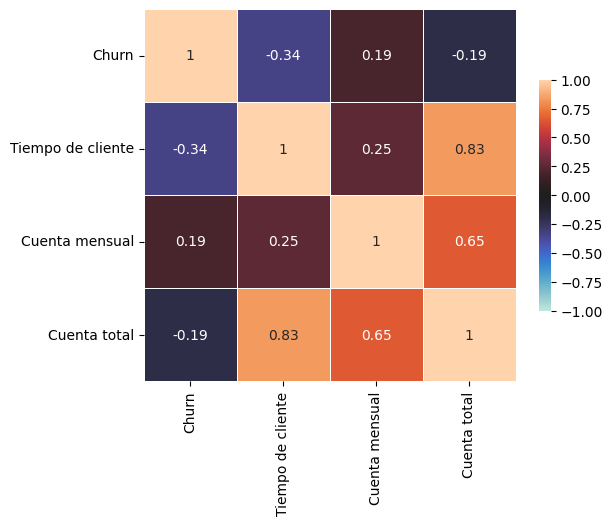

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.heatmap(np.round(corr_num,2), vmax = 1, vmin = -1, center = 0,
                          square = True, linewidths=.5,  annot=True, cbar_kws={"shrink": .5})

plt.show()

## Eliminación de columnas irrelevantes

Eliminamos las columnas irrelevantes para el entrenamiento de nuestro modelo, basandonos hasta ahora en el análisis de correlación.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerID                  7267 non-null   object 
 1   Churn                       7267 non-null   bool   
 2   Genero                      7267 non-null   object 
 3   Mayor a 65 Años             7267 non-null   bool   
 4   Casad@                      7267 non-null   bool   
 5   Dependientes                7267 non-null   bool   
 6   Tiempo de cliente           7267 non-null   int64  
 7   Servicio de telefonia       7267 non-null   bool   
 8   Multiples lineas            7267 non-null   bool   
 9   Servicio de Internet        7267 non-null   object 
 10  Seguridad en linea          7267 non-null   bool   
 11  Respaldo en linea           7267 non-null   bool   
 12  Proteccion del dispositivo  7267 non-null   bool   
 13  Soporte Premium             7267 

In [9]:
df = df.drop(['customerID', 'Cuenta mensual', 'Cuenta diaria'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Churn                       7267 non-null   bool   
 1   Genero                      7267 non-null   object 
 2   Mayor a 65 Años             7267 non-null   bool   
 3   Casad@                      7267 non-null   bool   
 4   Dependientes                7267 non-null   bool   
 5   Tiempo de cliente           7267 non-null   int64  
 6   Servicio de telefonia       7267 non-null   bool   
 7   Multiples lineas            7267 non-null   bool   
 8   Servicio de Internet        7267 non-null   object 
 9   Seguridad en linea          7267 non-null   bool   
 10  Respaldo en linea           7267 non-null   bool   
 11  Proteccion del dispositivo  7267 non-null   bool   
 12  Soporte Premium             7267 non-null   bool   
 13  Suscripción por cable       7267 

## Análisis guiado

<Axes: xlabel='Cuenta total', ylabel='Churn'>

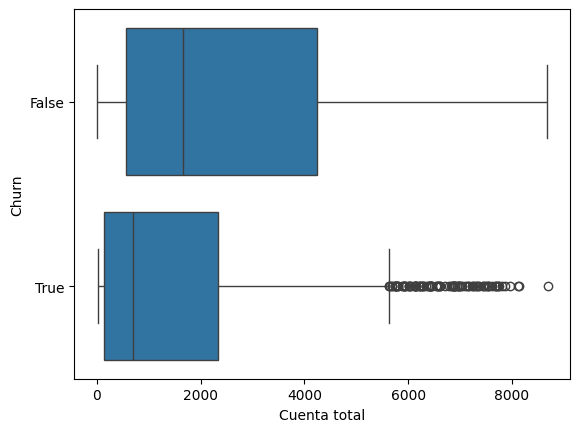

In [10]:
sns.boxplot(data=df, x='Cuenta total', y='Churn', orient='h')

<Axes: xlabel='Tiempo de cliente', ylabel='Churn'>

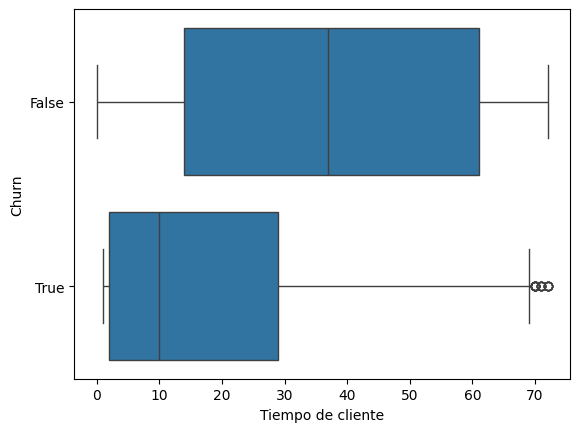

In [11]:
sns.boxplot(data=df, x='Tiempo de cliente', y='Churn', orient='h')

## Codificación de las variables categoricas

Iniciamos con la codificación de las variables categorias para su posterior uso en el entrenamiento de nuestro modelo de ML.

In [12]:
X = df.drop(columns='Churn', axis=1)
y = df['Churn']

In [13]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer

categoricas = ['Genero', 'Mayor a 65 Años', 'Casad@', 'Dependientes', 'Servicio de telefonia',
               'Multiples lineas', 'Servicio de Internet', 'Seguridad en linea', 'Respaldo en linea',
               'Proteccion del dispositivo', 'Soporte Premium', 'Suscripción por cable', 'Streaming Peliculas',
               'Tipo de contrato', 'Facturacion en linea', 'Forma de pago']

one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'), categoricas),
                                  remainder='passthrough',
                                  sparse_threshold=0,
                                  force_int_remainder_cols=False)

In [14]:
columnas = X.columns
X = one_hot.fit_transform(X)
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__Genero_male',
       'onehotencoder__Mayor a 65 Años_True',
       'onehotencoder__Casad@_True', 'onehotencoder__Dependientes_True',
       'onehotencoder__Servicio de telefonia_True',
       'onehotencoder__Multiples lineas_True',
       'onehotencoder__Servicio de Internet_dsl',
       'onehotencoder__Servicio de Internet_fiber optic',
       'onehotencoder__Servicio de Internet_no',
       'onehotencoder__Seguridad en linea_True',
       'onehotencoder__Respaldo en linea_True',
       'onehotencoder__Proteccion del dispositivo_True',
       'onehotencoder__Soporte Premium_True',
       'onehotencoder__Suscripción por cable_True',
       'onehotencoder__Streaming Peliculas_True',
       'onehotencoder__Tipo de contrato_month-to-month',
       'onehotencoder__Tipo de contrato_one year',
       'onehotencoder__Tipo de contrato_two year',
       'onehotencoder__Facturacion en linea_True',
       'onehotencoder__Forma de pago_bank transfer (automatic)',
       'one

In [15]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

## Separación de datos

Ahora separamos los datos entre el conjunto de prueba y el conjunto de entrenamiento.

In [16]:
from sklearn.model_selection import train_test_split as ttt

X, X_test, y, y_test = ttt(X, y, test_size=0.2, random_state=785, stratify=y)
X_train, X_val, y_train, y_val = ttt(X,y,stratify=y,random_state=785)

## Creación del modelo Baseline

El modelo base se usa para tener un punto de partida de los modelos futuros

In [17]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(X_train,y_train)
dummy.score(X_test,y_test)

0.7427785419532325

## Creando datos normalizados, y con estrategias de OVERSAMPLING y UNDERSAMPLING

Crearemos varios grupos de datos para probar con los modelos que entrenaremos, esto con el fin de evaluar cual es el mejor modelo para entregar a la empresa.

Se realiza una estrategia de tener distintos grupos de datos con cada estrategia, como el Oversampling, el undersampling, y la normalización de datos. De esta manera podemos tener los datos listos para cualquier modelo que deseemos probar con los datos y así explorar cual es el modelo más útil para la lógica del negocio.

Adicionalmente normalizamos los datos, para hacer las pruebas con los modelos en los que la escala de las variables puede afectar como el modelo KNN, y normalizar los datos no tiene ningún problema al trabajar con otros modelos como el DecisionTree ya que ese tipo de modelos no es afectado por la escala de las variables.

In [18]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import MinMaxScaler

oversampling = SMOTE()
X_train_smote, y_train_smote = oversampling.fit_resample(X_train,y_train)
X_smote, y_smote = oversampling.fit_resample(X,y)

nearmiss = NearMiss(version=3)
X_train_nearmiss, y_train_nearmiss = nearmiss.fit_resample(X_train,y_train)
X_Nearmiss, y_Nearmiss = nearmiss.fit_resample(X,y)

normalizacion = MinMaxScaler()
X_normalizado = normalizacion.fit_transform(X)
X_normalizado_smote = normalizacion.fit_transform(X_smote)
X_normalizado_nearmiss = normalizacion.fit_transform(X_Nearmiss)
X_val_normalizado = normalizacion.fit_transform(X_val)
X_train_normalizado = normalizacion.fit_transform(X_train)
X_test_normalizado = normalizacion.fit_transform(X_test)
X_train_normalizado_smote = normalizacion.fit_transform(X_train_smote)
X_train_normalizado_nearmiss = normalizacion.fit_transform(X_train_nearmiss)

In [19]:
dummy = DummyClassifier()
dummy.fit(X_train_smote,y_train_smote)
dummy.score(X_test,y_test)

0.7427785419532325

In [20]:
dummy = DummyClassifier()
dummy.fit(X_train_nearmiss,y_train_nearmiss)
dummy.score(X_test,y_test)

0.7427785419532325

## Creación y validación de modelos

Ahora creamos distintos modelos, con el fin de comparar los distintos rendimientos de cada modelo, para elegir el mejor modelo.

In [21]:
from sklearn.model_selection import StratifiedKFold, cross_validate

def val_cros (modelo,X_cros,y_cros):
  skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=785)
  cv_resultados = cross_validate(modelo,X_cros,y_cros,cv=skf,scoring='recall')
  return cv_resultados

def intervalo_confianza (resultados):
  promedio = resultados['test_score'].mean()
  desvio_std = resultados['test_score'].std()
  return f'El intervalo de confianza es: [{promedio-2*desvio_std}, {min(promedio+2*desvio_std,1)}]'

### Modelo de árbol

Entrenamiento de modelo de árbol sin balanceo de datos



In [22]:
from sklearn.tree import DecisionTreeClassifier

modelo_arbol = DecisionTreeClassifier(random_state=785, max_depth=6)
modelo_arbol.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=785)

In [23]:
modelo_arbol.score(X_val,y_val)

0.7792297111416782

In [24]:
val_cros(modelo_arbol,X,y)

{'fit_time': array([0.01772714, 0.01725316, 0.01536989, 0.01615381, 0.01802707]),
 'score_time': array([0.00432801, 0.00379968, 0.00315046, 0.00416541, 0.00316882]),
 'test_score': array([0.39799331, 0.52508361, 0.4548495 , 0.4548495 , 0.42140468])}

In [25]:
intervalo_confianza(val_cros(modelo_arbol,X,y))

'El intervalo de confianza es: [0.36502947044374806, 0.5366427703589275]'

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def matriz_confusion (modelo,X_val):
  y_previsto = modelo.predict(X_val)
  matr_conf = confusion_matrix(y_val,y_previsto)
  visualizacion = ConfusionMatrixDisplay(confusion_matrix=matr_conf,display_labels=['No cancela', 'Cancela'])
  visualizacion.plot();

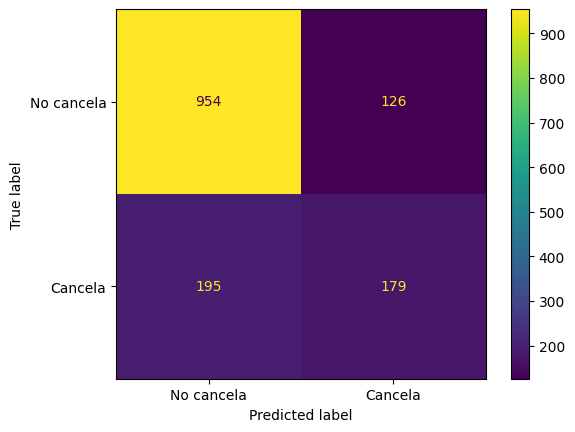

In [27]:
matriz_confusion(modelo_arbol,X_val)

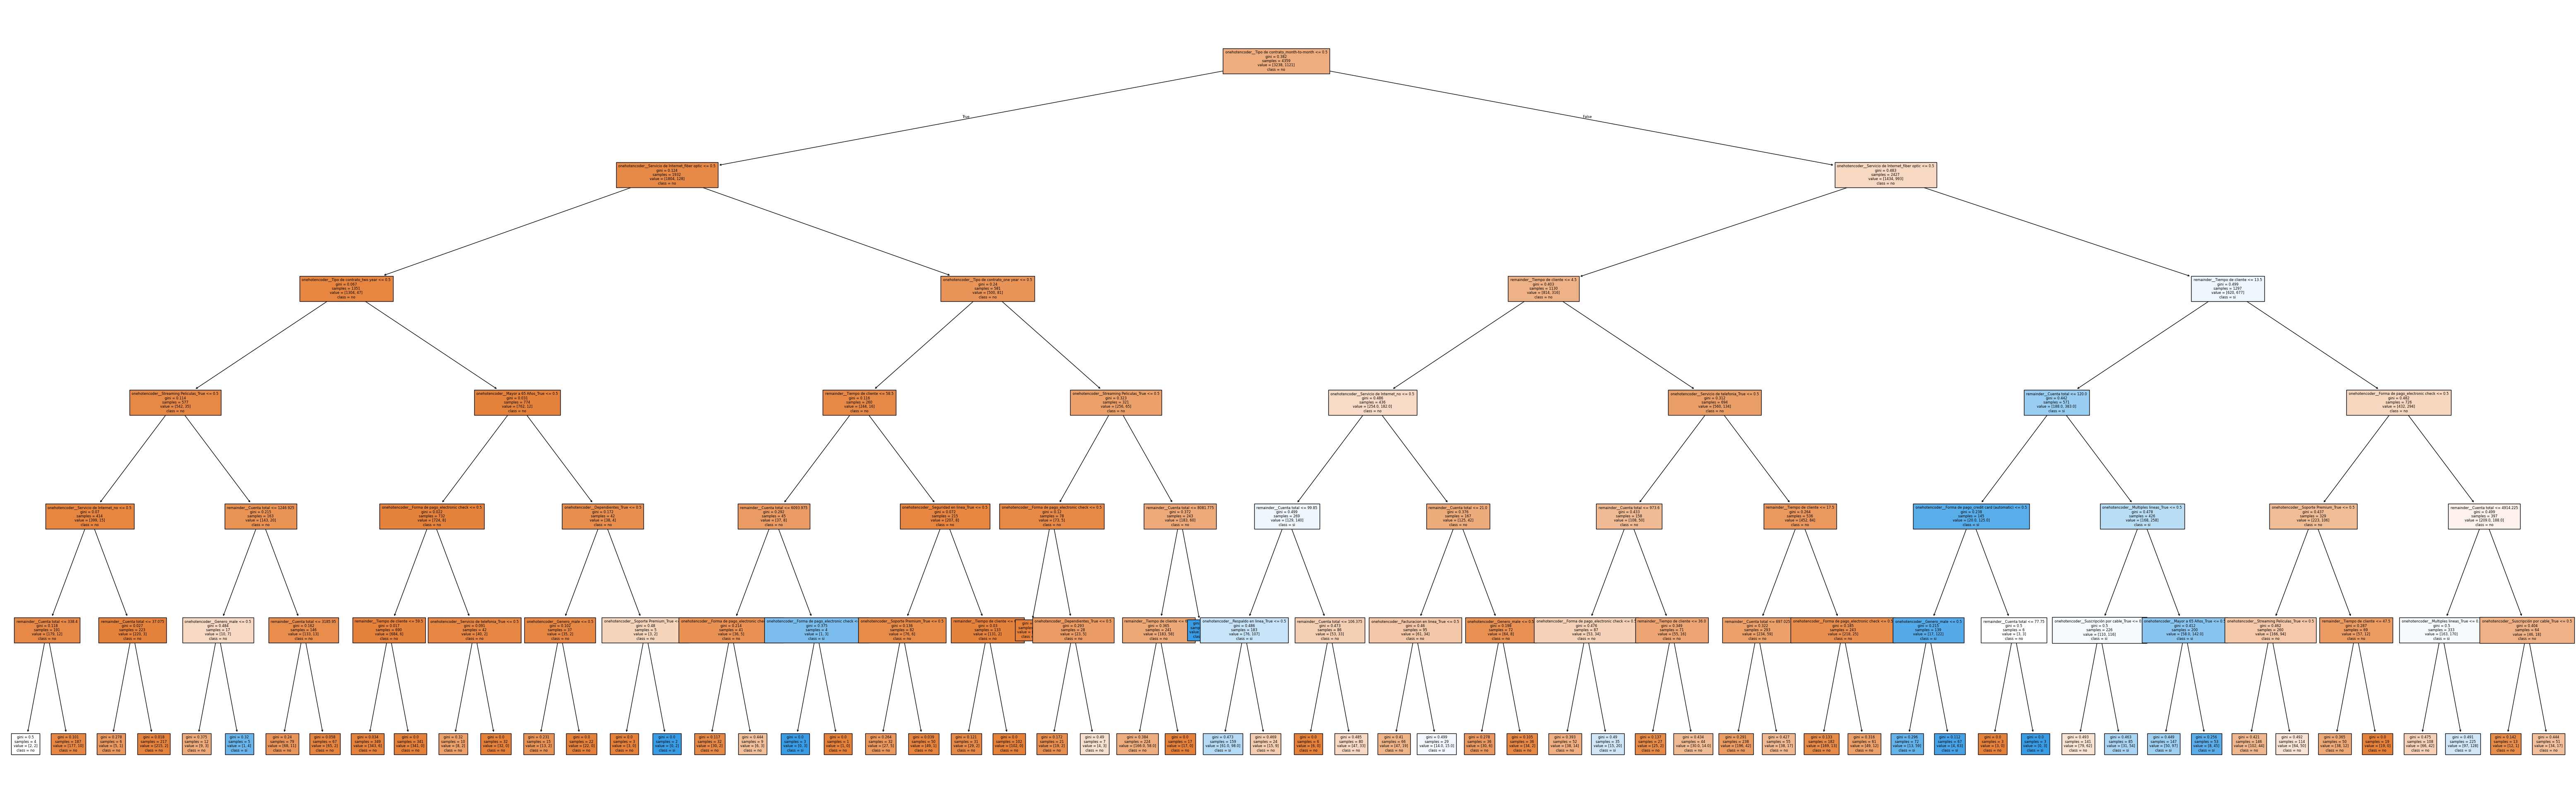

In [28]:
from sklearn.tree import plot_tree

valores_columnas = one_hot.get_feature_names_out()

plt.figure(figsize=(80,25))
plot_tree(modelo_arbol,filled=True, class_names=['no','si'],fontsize=6, feature_names=valores_columnas.tolist())
plt.show()

Entrenamiento del modelo con los datos balanceados

In [29]:
modelo_arbol_smote = DecisionTreeClassifier(random_state=785, max_depth=6)
modelo_arbol_smote.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(max_depth=6, random_state=785)

In [30]:
modelo_arbol_smote.score(X_val,y_val)

0.7647867950481431

In [31]:
val_cros(modelo_arbol_smote,X_smote,y_smote)

{'fit_time': array([0.05750728, 0.04823351, 0.05268216, 0.05333662, 0.05779505]),
 'score_time': array([0.00472403, 0.00450182, 0.00454593, 0.00461102, 0.00481296]),
 'test_score': array([0.81712963, 0.7589803 , 0.81344148, 0.86921296, 0.86921296])}

In [32]:
intervalo_confianza(val_cros(modelo_arbol_smote,X_smote,y_smote))

'El intervalo de confianza es: [0.743318171319812, 0.9078727646915179]'

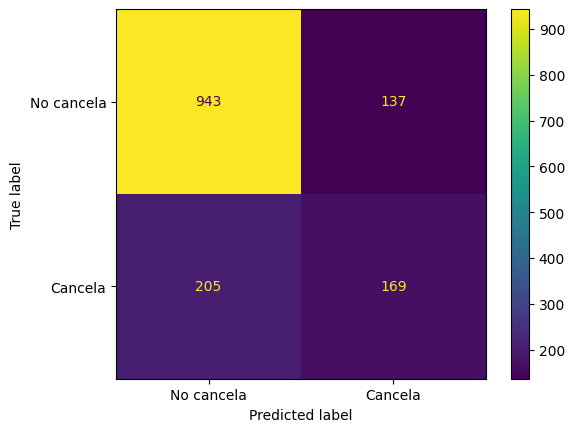

In [33]:
matriz_confusion(modelo_arbol_smote,X_val)

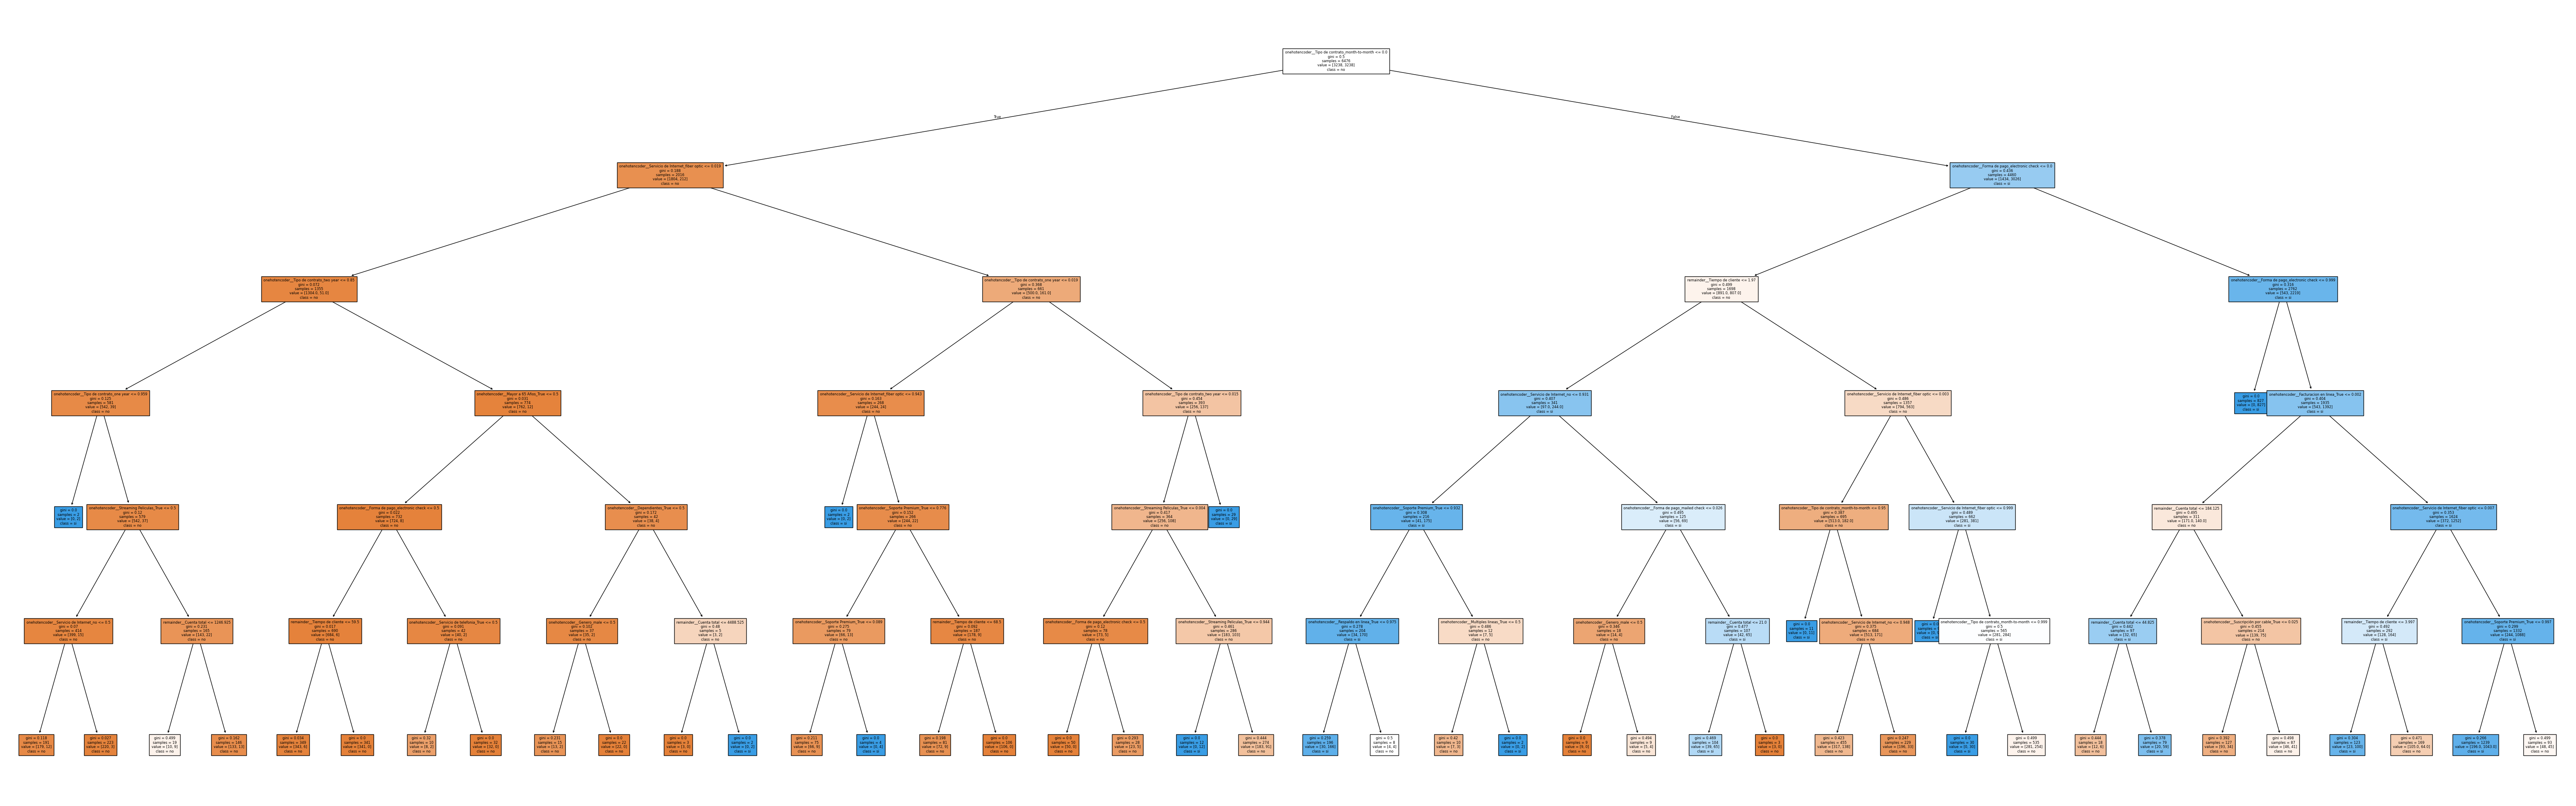

In [34]:
plt.figure(figsize=(80,25))
plot_tree(modelo_arbol_smote,filled=True, class_names=['no','si'],fontsize=6, feature_names=valores_columnas.tolist())
plt.show()

In [35]:
modelo_arbol_nearmiss = DecisionTreeClassifier(random_state=785, max_depth=6)
modelo_arbol_nearmiss.fit(X_train_nearmiss,y_train_nearmiss)

DecisionTreeClassifier(max_depth=6, random_state=785)

In [36]:
modelo_arbol_nearmiss.score(X_val,y_val)

0.7613480055020633

In [37]:
val_cros(modelo_arbol_nearmiss,X_Nearmiss,y_Nearmiss)

{'fit_time': array([0.02099466, 0.01238489, 0.01207471, 0.01219273, 0.01140499]),
 'score_time': array([0.00434089, 0.00414562, 0.00402045, 0.00400257, 0.00439715]),
 'test_score': array([0.70234114, 0.65551839, 0.72240803, 0.68227425, 0.64882943])}

In [38]:
intervalo_confianza(val_cros(modelo_arbol_nearmiss,X_Nearmiss,y_Nearmiss))

'El intervalo de confianza es: [0.6267921301583205, 0.7377563648249571]'

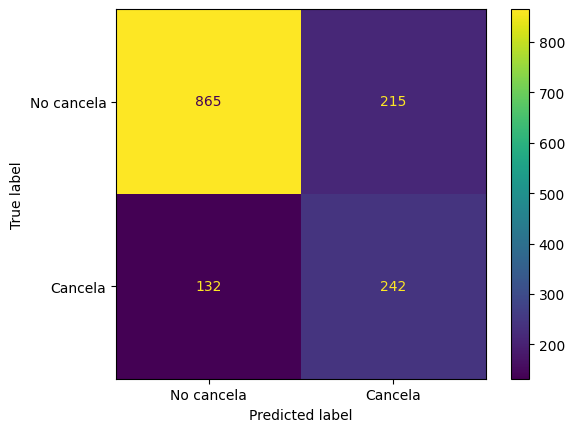

In [39]:
matriz_confusion(modelo_arbol_nearmiss,X_val)

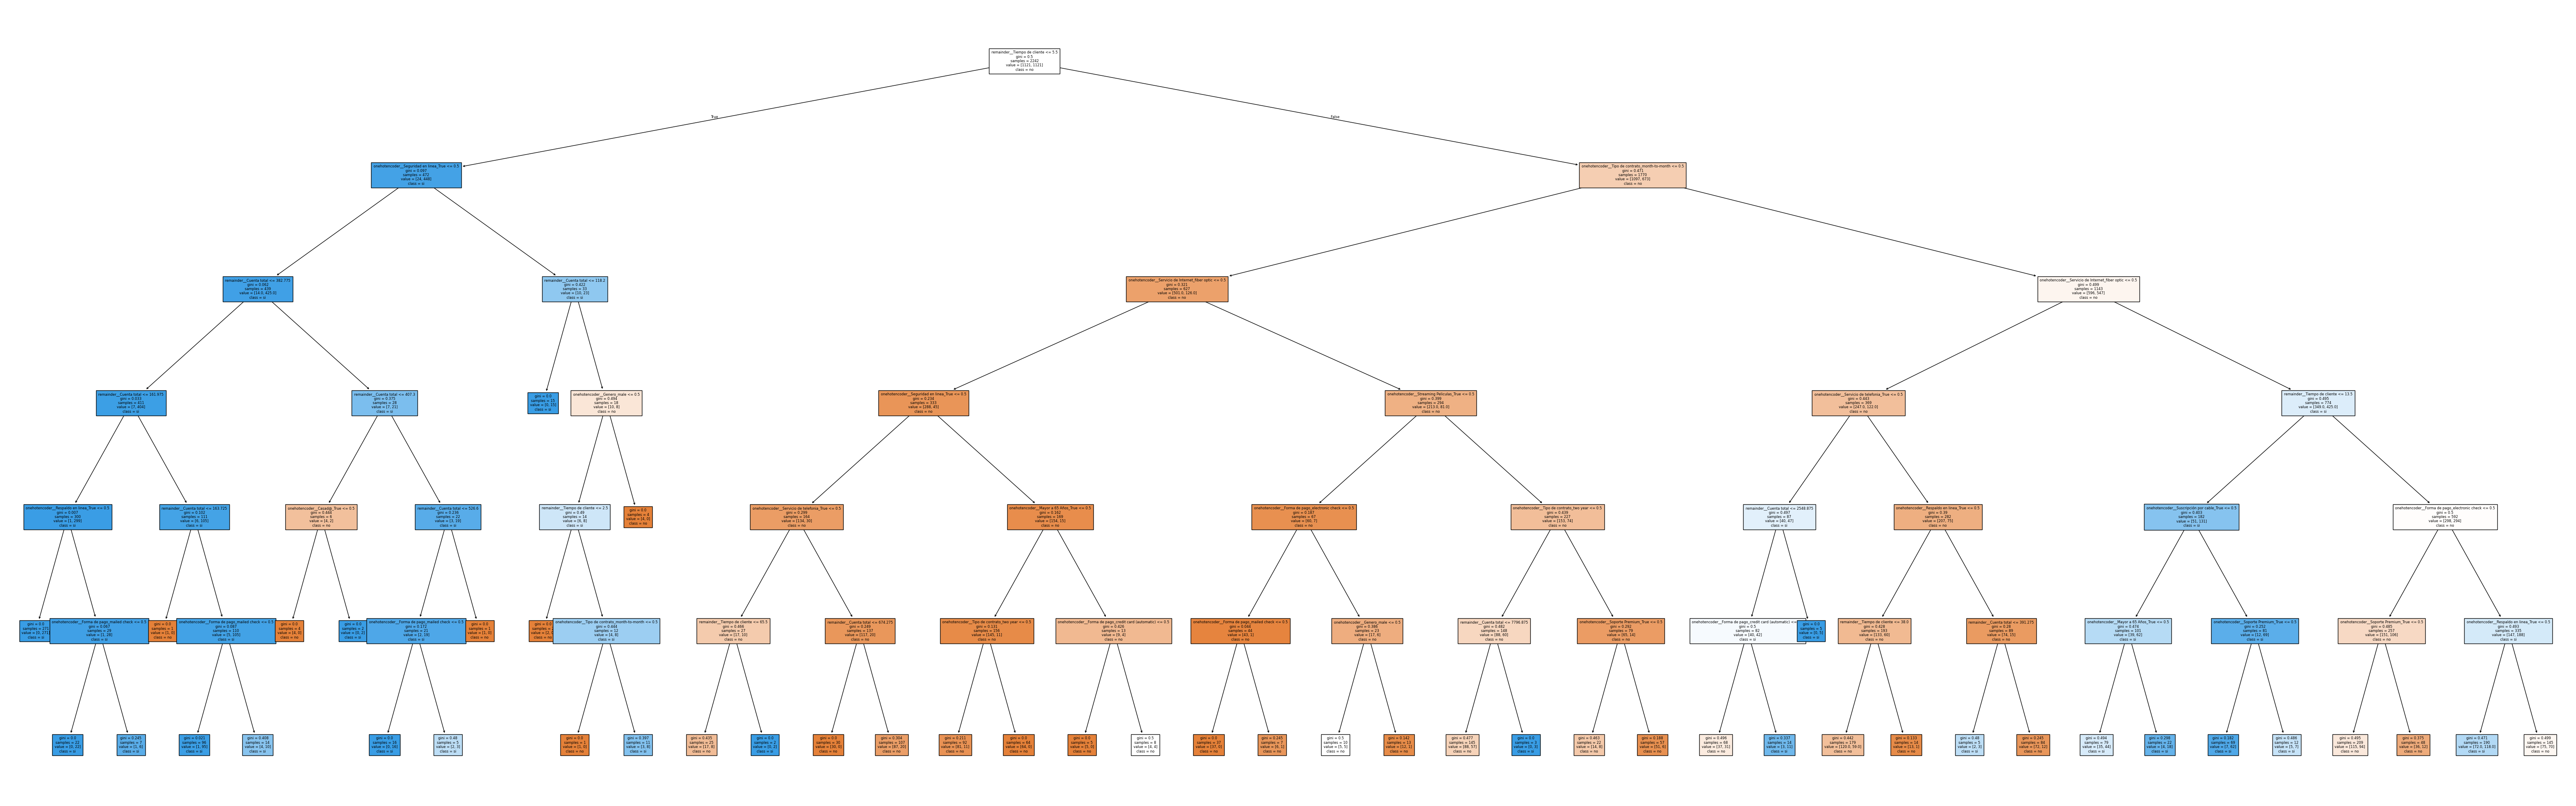

In [40]:
plt.figure(figsize=(80,25))
plot_tree(modelo_arbol_nearmiss,filled=True, class_names=['no','si'],fontsize=6, feature_names=valores_columnas.tolist())
plt.show()

### Modelo RandomForestClassifier

Entrenamiento del modelo sin balanceo de datos

In [41]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(max_depth=9, random_state=785)
modelo_rf.fit(X_train,y_train)
modelo_rf.score(X_val,y_val)

0.8019257221458047

In [42]:
val_cros(modelo_rf,X,y)

{'fit_time': array([0.50996494, 0.51458454, 0.49693584, 0.50904179, 0.49581313]),
 'score_time': array([0.02431679, 0.02318549, 0.02499652, 0.02296853, 0.02504134]),
 'test_score': array([0.48160535, 0.47826087, 0.43478261, 0.46488294, 0.5083612 ])}

In [43]:
intervalo_confianza(val_cros(modelo_rf,X,y))

'El intervalo de confianza es: [0.42560422454303387, 0.5215529660924177]'

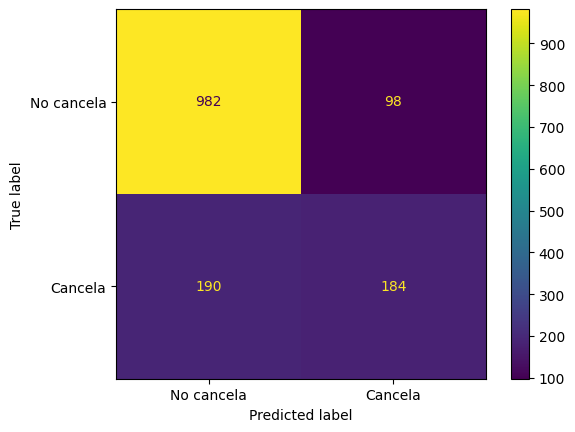

In [44]:
matriz_confusion(modelo_rf,X_val)

Entrenamiento del modelo con balanceo de datos

In [45]:
modelo_rf_smote = RandomForestClassifier(max_depth=9, random_state=785)
modelo_rf_smote.fit(X_train_smote,y_train_smote)
modelo_rf_smote.score(X_val,y_val)

0.7840440165061898

In [46]:
val_cros(modelo_rf_smote,X_smote,y_smote)

{'fit_time': array([1.34697437, 0.95894575, 0.89647007, 0.92434835, 0.89870238]),
 'score_time': array([0.03930163, 0.02707052, 0.02682304, 0.02661014, 0.02906251]),
 'test_score': array([0.85185185, 0.87253766, 0.8829664 , 0.88425926, 0.87731481])}

In [47]:
intervalo_confianza(val_cros(modelo_rf_smote,X_smote,y_smote))

'El intervalo de confianza es: [0.8503068723220109, 0.8972651202963318]'

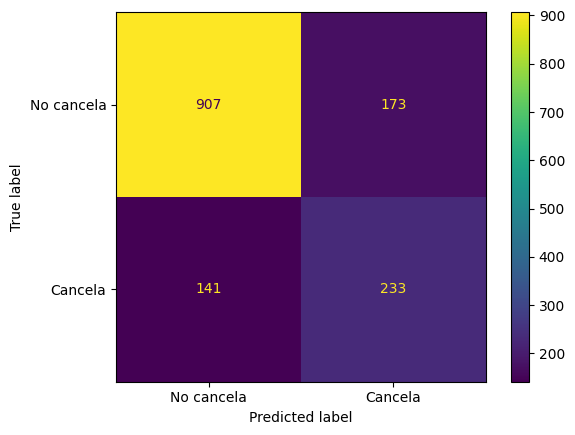

In [48]:
matriz_confusion(modelo_rf_smote,X_val)

In [49]:
modelo_rf_nearmiss = RandomForestClassifier(max_depth=9, random_state=785)
modelo_rf_nearmiss.fit(X_train_nearmiss,y_train_nearmiss)
modelo_rf_nearmiss.score(X_val,y_val)

0.7599724896836314

In [50]:
val_cros(modelo_rf_nearmiss,X_Nearmiss,y_Nearmiss)

{'fit_time': array([0.33164287, 0.32594395, 0.36739731, 0.5665288 , 0.52712131]),
 'score_time': array([0.01646543, 0.01648545, 0.02319789, 0.02377295, 0.02223492]),
 'test_score': array([0.69230769, 0.65886288, 0.67892977, 0.65551839, 0.69230769])}

In [51]:
intervalo_confianza(val_cros(modelo_rf_nearmiss,X_Nearmiss,y_Nearmiss))

'El intervalo de confianza es: [0.64392733226435, 0.707243236297523]'

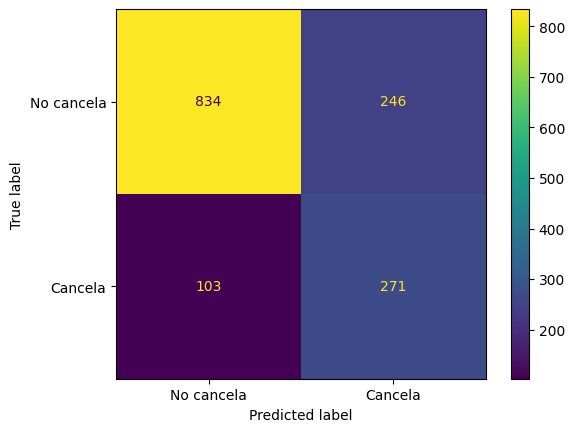

In [52]:
matriz_confusion(modelo_rf_nearmiss,X_val)

### Modelo KNN

Entrenamiento del modelo KNN sin balanceo de clases

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_normalizado,y_train)
knn.score(X_val_normalizado,y_val)

0.7393397524071527

In [54]:
val_cros(knn,X_normalizado,y)

{'fit_time': array([0.00352693, 0.00223541, 0.00193787, 0.00195789, 0.00191283]),
 'score_time': array([0.0717454 , 0.07552338, 0.06995463, 0.07126379, 0.07023168]),
 'test_score': array([0.48829431, 0.48494983, 0.45150502, 0.49832776, 0.43812709])}

In [55]:
intervalo_confianza(val_cros(knn,X_normalizado,y))

'El intervalo de confianza es: [0.4258211329153244, 0.518660472435846]'

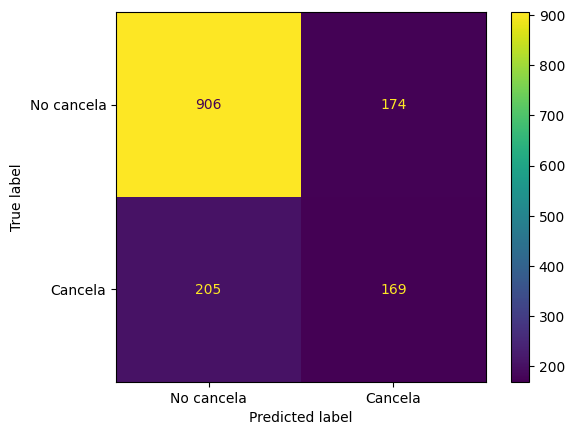

In [56]:
matriz_confusion(knn,X_val_normalizado)

Entrenamiento del modelo KNN con el balanceo de clases

In [57]:
knn_smote = KNeighborsClassifier()
knn_smote.fit(X_train_normalizado_smote,y_train_smote)
knn_smote.score(X_val_normalizado,y_val)

0.6801925722145805

In [58]:
val_cros(knn_smote,X_normalizado_smote,y_smote)

{'fit_time': array([0.00162268, 0.00152135, 0.00159788, 0.00164437, 0.00148678]),
 'score_time': array([0.07603025, 0.0928793 , 0.07596231, 0.07934308, 0.0749433 ]),
 'test_score': array([0.88194444, 0.87137891, 0.89803013, 0.88425926, 0.90162037])}

In [59]:
intervalo_confianza(val_cros(knn_smote,X_normalizado_smote,y_smote))

'El intervalo de confianza es: [0.8653285698575336, 0.9095646750675769]'

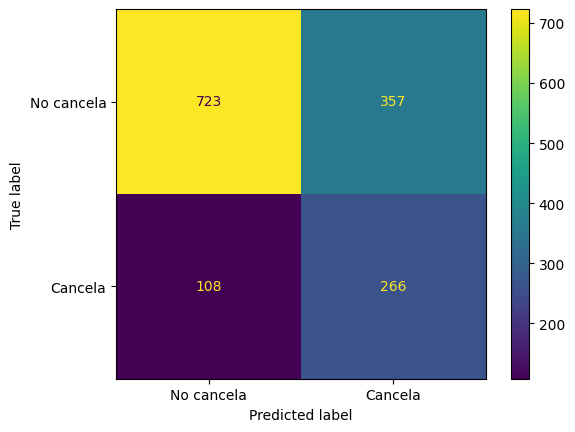

In [60]:
matriz_confusion(knn_smote, X_val_normalizado)

In [61]:
knn_nearmiss = KNeighborsClassifier()
knn_nearmiss.fit(X_train_normalizado_nearmiss,y_train_nearmiss)
knn_nearmiss.score(X_test_normalizado,y_test)

0.7028885832187071

In [62]:
val_cros(knn_nearmiss,X_normalizado_nearmiss,y_Nearmiss)

{'fit_time': array([0.00209665, 0.00103021, 0.00105476, 0.00106335, 0.00104237]),
 'score_time': array([0.01292372, 0.013412  , 0.01341605, 0.01343107, 0.01544213]),
 'test_score': array([0.7090301 , 0.69565217, 0.69899666, 0.71237458, 0.74916388])}

In [63]:
intervalo_confianza(val_cros(knn_nearmiss,X_normalizado_nearmiss,y_Nearmiss))

'El intervalo de confianza es: [0.6748753374777602, 0.7512116190439787]'

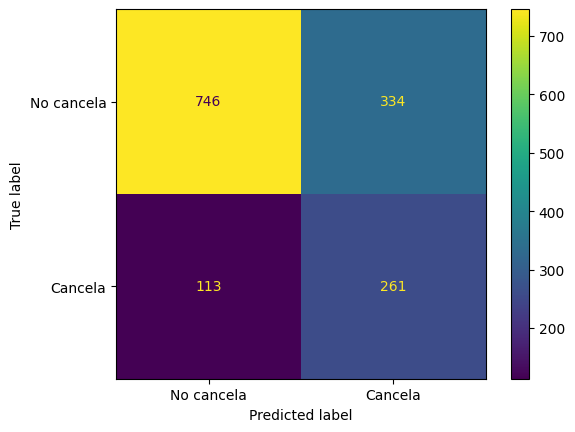

In [64]:
matriz_confusion(knn_nearmiss, X_val_normalizado)

### Modelo de Regresión logística

Creacion y entrenamiento del modelo de regresión logística sin balanceo de clases

In [65]:
from sklearn.linear_model import LogisticRegression

modelo_log = LogisticRegression(max_iter=1000)
modelo_log.fit(X_train_normalizado, y_train)
print("Precisión Regresión Logística:", modelo_log.score(X_val_normalizado, y_test))

Precisión Regresión Logística: 0.6437414030261348


In [66]:
val_cros(modelo_log,X_normalizado,y)

{'fit_time': array([0.02331185, 0.02057862, 0.02149105, 0.02177238, 0.02183628]),
 'score_time': array([0.003896  , 0.00384617, 0.00373888, 0.0038197 , 0.00416541]),
 'test_score': array([0.53846154, 0.48160535, 0.44816054, 0.5451505 , 0.5451505 ])}

In [67]:
intervalo_confianza(val_cros(modelo_log,X_normalizado,y))

'El intervalo de confianza es: [0.43222233697651935, 0.5911890342609388]'

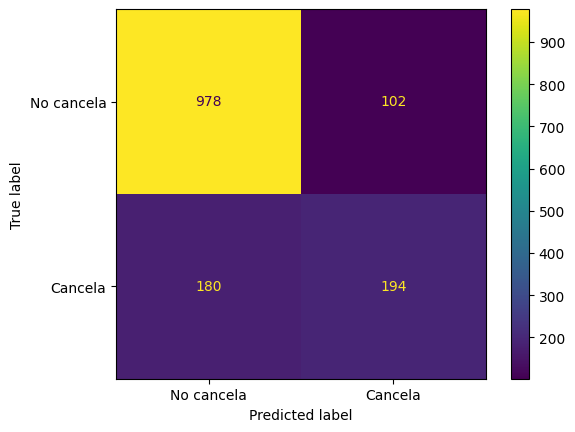

In [68]:
matriz_confusion(modelo_log,X_val_normalizado)

In [69]:
modelo_log_smote = LogisticRegression(max_iter=1000)
modelo_log_smote.fit(X_train_normalizado_smote, y_train_smote)
print("Precisión Regresión Logística SMOTE:", modelo_log.score(X_val_normalizado, y_val))

Precisión Regresión Logística SMOTE: 0.8060522696011004


In [70]:
val_cros(modelo_log_smote,X_normalizado_smote,y_smote)

{'fit_time': array([0.02865958, 0.0295167 , 0.02692294, 0.03196168, 0.02719355]),
 'score_time': array([0.00404668, 0.00382352, 0.00380182, 0.00390816, 0.00388074]),
 'test_score': array([0.79282407, 0.8424102 , 0.81228273, 0.80671296, 0.80208333])}

In [71]:
intervalo_confianza(val_cros(modelo_log_smote,X_normalizado_smote,y_smote))

'El intervalo de confianza es: [0.7776037733748339, 0.8449215474268482]'

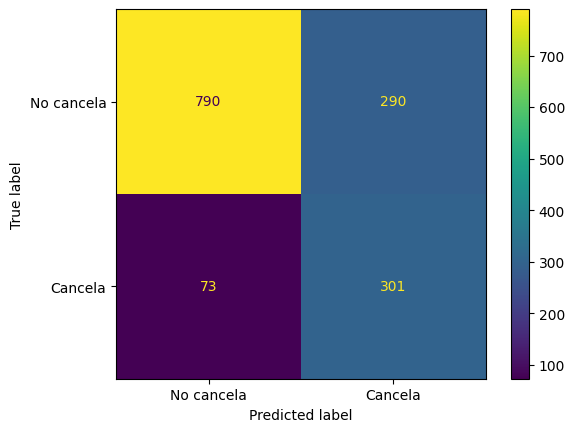

In [72]:
matriz_confusion(modelo_log_smote,X_val_normalizado)

In [73]:
modelo_log_nearmiss = LogisticRegression(max_iter=1000)
modelo_log_nearmiss.fit(X_train_normalizado_nearmiss, y_train_nearmiss)
print("Precisión Regresión Logística NearMiss:", modelo_log.score(X_val_normalizado, y_val))

Precisión Regresión Logística NearMiss: 0.8060522696011004


In [74]:
val_cros(modelo_log_nearmiss,X_normalizado_nearmiss,y_Nearmiss)

{'fit_time': array([0.01459527, 0.01132464, 0.01061583, 0.01316452, 0.01635265]),
 'score_time': array([0.00384855, 0.00368237, 0.00359869, 0.00376987, 0.00371695]),
 'test_score': array([0.73913043, 0.72909699, 0.77591973, 0.72909699, 0.7458194 ])}

In [75]:
intervalo_confianza(val_cros(modelo_log_nearmiss,X_normalizado_nearmiss,y_Nearmiss))

'El intervalo de confianza es: [0.7092883266874542, 0.7783370913727464]'

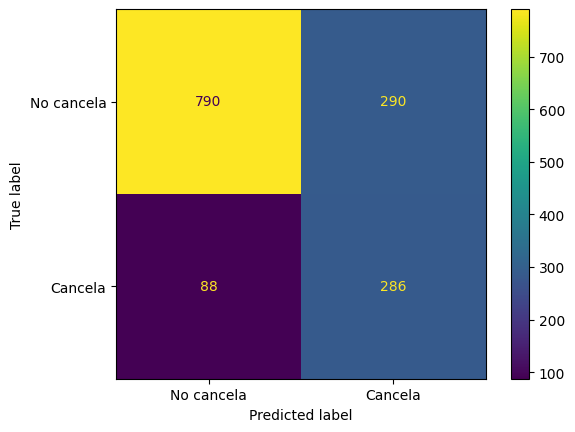

In [76]:
matriz_confusion(modelo_log_nearmiss,X_val_normalizado)

## Evaluación de modelos

Utilizamos distintas estrategias para la validación de modelos, como la validación cruzada y en el caso de estudio actual, revisar el 'recall' de los modelos, ya que la intención del negocio es encontrar los clientes que van a dejar la empresa, si el modelo disminuye los falsos negativos incluso llevando a clientes que no van a dejar la empresa a clasificarlos como que van a dejar la empresa.

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, RocCurveDisplay, roc_auc_score, PrecisionRecallDisplay, average_precision_score, classification_report

### Evaluación de modelos de arbol

#### Árbol sin balanceo

In [78]:
y_previsto_arbol = modelo_arbol.predict(X_val)
print(f'La precisión del modelo de árbol es: {precision_score(y_val,y_previsto_arbol)}')
print(f'La sensibilidad (Recall) del modelo de árbol es: {recall_score(y_val,y_previsto_arbol)}')
print(f'La exactitud (accuracy) del modelo de árbol es: {accuracy_score(y_val,y_previsto_arbol)}')
print(f'El F1-score del modelo de árbol es: {f1_score(y_val,y_previsto_arbol)}')

La precisión del modelo de árbol es: 0.5868852459016394
La sensibilidad (Recall) del modelo de árbol es: 0.4786096256684492
La exactitud (accuracy) del modelo de árbol es: 0.7792297111416782
El F1-score del modelo de árbol es: 0.5272459499263623


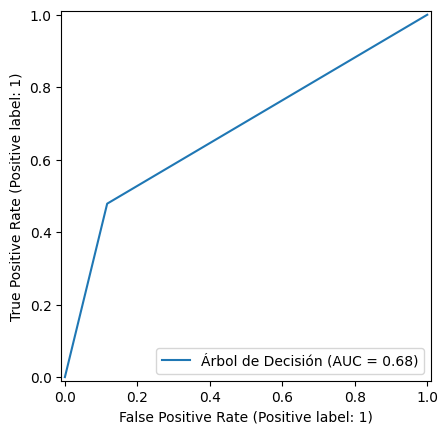

In [79]:
RocCurveDisplay.from_predictions(y_val,y_previsto_arbol,name='Árbol de Decisión');

In [80]:
print(f'El área bajo la curva ROC es: {roc_auc_score(y_val,y_previsto_arbol)}')

El área bajo la curva ROC es: 0.6809714795008912


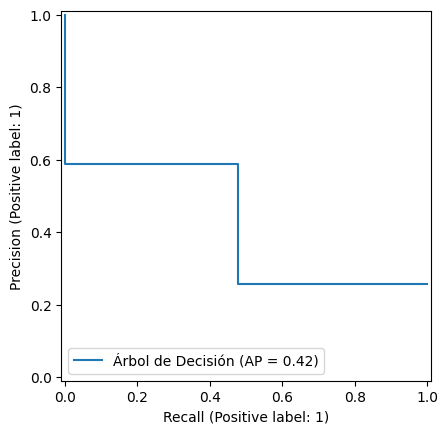

In [81]:
PrecisionRecallDisplay.from_predictions(y_val,y_previsto_arbol,name='Árbol de Decisión');

In [82]:
print(f'El score promedio de precisión vs recall es: {average_precision_score(y_val,y_previsto_arbol)}')

El score promedio de precisión vs recall es: 0.41500172014843084


              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1080
           1       0.59      0.48      0.53       374

    accuracy                           0.78      1454
   macro avg       0.71      0.68      0.69      1454
weighted avg       0.77      0.78      0.77      1454



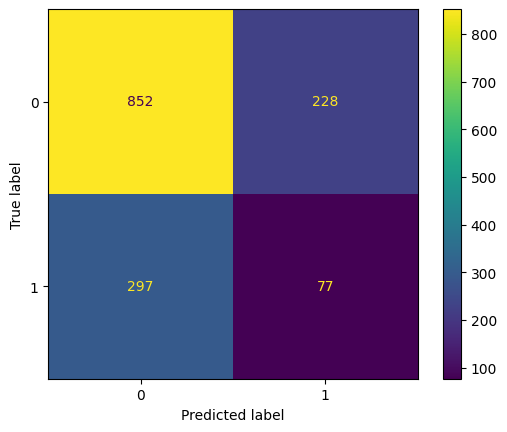

In [83]:
print(classification_report(y_val,y_previsto_arbol))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto_arbol);

#### Árbol SMOTE

In [84]:
y_previsto_arbol_smote = modelo_arbol_smote.predict(X_val)
print(f'La precisión del modelo de árbol (SMOTE) es: {precision_score(y_val,y_previsto_arbol_smote)}')
print(f'La sensibilidad (Recall) del modelo de árbol (SMOTE) es: {recall_score(y_val,y_previsto_arbol_smote)}')
print(f'La exactitud (accuracy) del modelo de árbol (SMOTE) es: {accuracy_score(y_val,y_previsto_arbol_smote)}')
print(f'El F1-score del modelo de árbol (SMOTE) es: {f1_score(y_val,y_previsto_arbol_smote)}')

La precisión del modelo de árbol (SMOTE) es: 0.5522875816993464
La sensibilidad (Recall) del modelo de árbol (SMOTE) es: 0.45187165775401067
La exactitud (accuracy) del modelo de árbol (SMOTE) es: 0.7647867950481431
El F1-score del modelo de árbol (SMOTE) es: 0.4970588235294118


El área bajo la curva ROC es: 0.6625099029510795


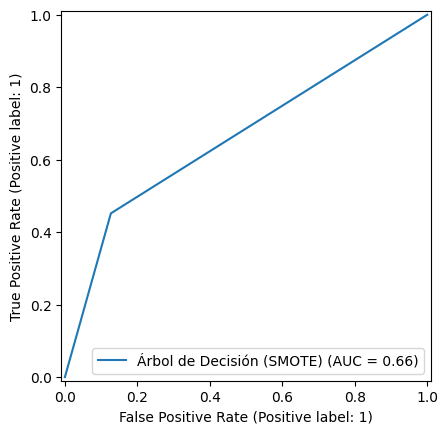

In [85]:
print(f'El área bajo la curva ROC es: {roc_auc_score(y_val,y_previsto_arbol_smote)}')
RocCurveDisplay.from_predictions(y_val,y_previsto_arbol_smote,name='Árbol de Decisión (SMOTE)');

El score promedio de precisión vs recall es: 0.39055347648870825


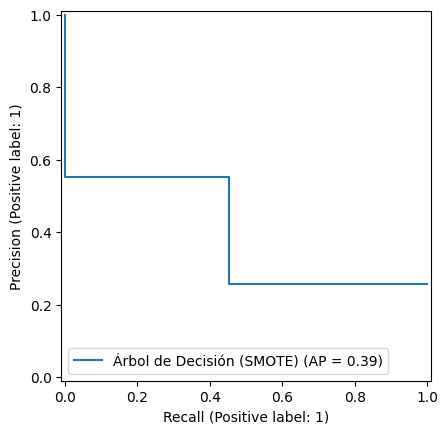

In [86]:
print(f'El score promedio de precisión vs recall es: {average_precision_score(y_val,y_previsto_arbol_smote)}')
PrecisionRecallDisplay.from_predictions(y_val,y_previsto_arbol_smote,name='Árbol de Decisión (SMOTE)');

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1080
           1       0.55      0.45      0.50       374

    accuracy                           0.76      1454
   macro avg       0.69      0.66      0.67      1454
weighted avg       0.75      0.76      0.76      1454



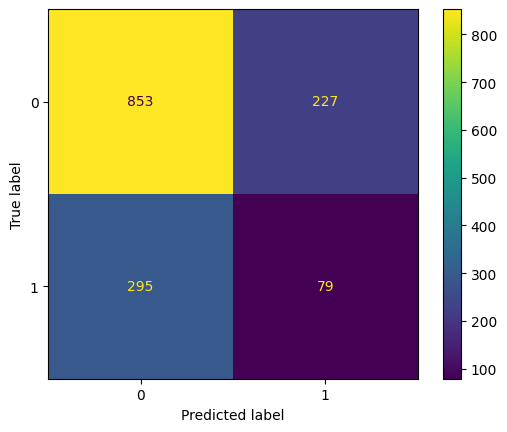

In [87]:
print(classification_report(y_val,y_previsto_arbol_smote))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto_arbol_smote);

#### Árbol NearMiss

In [88]:
y_previsto_arbol_nearmiss = modelo_arbol_nearmiss.predict(X_val)
print(f'La precisión del modelo de árbol (NearMiss) es: {precision_score(y_val,y_previsto_arbol_nearmiss)}')
print(f'La sensibilidad (Recall) del modelo de árbol (NearMiss) es: {recall_score(y_val,y_previsto_arbol_nearmiss)}')
print(f'La exactitud (accuracy) del modelo de árbol (NearMiss) es: {accuracy_score(y_val,y_previsto_arbol_nearmiss)}')
print(f'El F1-score del modelo de árbol (NearMiss) es: {f1_score(y_val,y_previsto_arbol_nearmiss)}')

La precisión del modelo de árbol (NearMiss) es: 0.5295404814004376
La sensibilidad (Recall) del modelo de árbol (NearMiss) es: 0.6470588235294118
La exactitud (accuracy) del modelo de árbol (NearMiss) es: 0.7613480055020633
El F1-score del modelo de árbol (NearMiss) es: 0.5824308062575211


El área bajo la curva ROC es: 0.7239923747276688


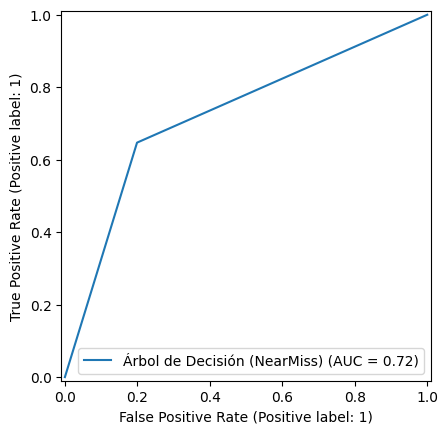

In [89]:
print(f'El área bajo la curva ROC es: {roc_auc_score(y_val,y_previsto_arbol_nearmiss)}')
RocCurveDisplay.from_predictions(y_val,y_previsto_arbol_nearmiss,name='Árbol de Decisión (NearMiss)');

El score promedio de precisión vs recall es: 0.43342788492267176


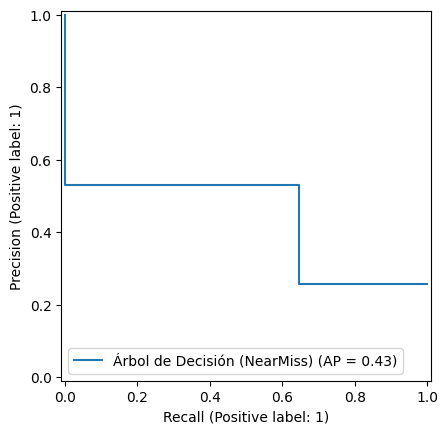

In [90]:
print(f'El score promedio de precisión vs recall es: {average_precision_score(y_val,y_previsto_arbol_nearmiss)}')
PrecisionRecallDisplay.from_predictions(y_val,y_previsto_arbol_nearmiss,name='Árbol de Decisión (NearMiss)');

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1080
           1       0.53      0.65      0.58       374

    accuracy                           0.76      1454
   macro avg       0.70      0.72      0.71      1454
weighted avg       0.78      0.76      0.77      1454



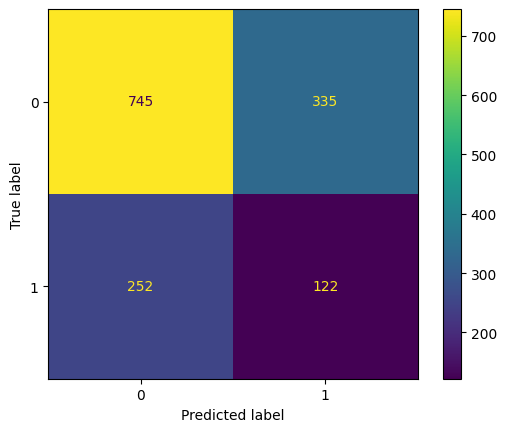

In [91]:
print(classification_report(y_val,y_previsto_arbol_nearmiss))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto_arbol_nearmiss);

### Evaluación de modelos RandomForestClassifier

#### RandomForestClassifier sin balanceo

In [92]:
y_previsto_rf = modelo_rf.predict(X_val)
print(f'La precisión del modelo de RFC es: {precision_score(y_val,y_previsto_rf)}')
print(f'La sensibilidad (Recall) del modelo de RFC es: {recall_score(y_val,y_previsto_rf)}')
print(f'La exactitud (accuracy) del modelo de RFC es: {accuracy_score(y_val,y_previsto_rf)}')
print(f'El F1-score del modelo de RFC es: {f1_score(y_val,y_previsto_rf)}')

La precisión del modelo de RFC es: 0.6524822695035462
La sensibilidad (Recall) del modelo de RFC es: 0.4919786096256685
La exactitud (accuracy) del modelo de RFC es: 0.8019257221458047
El F1-score del modelo de RFC es: 0.5609756097560976


El área bajo la curva ROC es: 0.7006189344424638


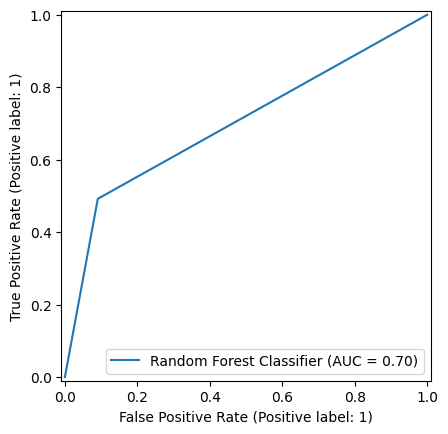

In [93]:
print(f'El área bajo la curva ROC es: {roc_auc_score(y_val,y_previsto_rf)}')
RocCurveDisplay.from_predictions(y_val,y_previsto_rf,name='Random Forest Classifier');

El score promedio de precisión vs recall es: 0.451681322506787


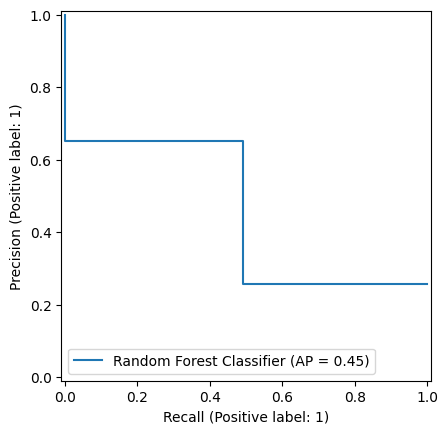

In [94]:
print(f'El score promedio de precisión vs recall es: {average_precision_score(y_val,y_previsto_rf)}')
PrecisionRecallDisplay.from_predictions(y_val,y_previsto_rf,name='Random Forest Classifier');

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1080
           1       0.65      0.49      0.56       374

    accuracy                           0.80      1454
   macro avg       0.75      0.70      0.72      1454
weighted avg       0.79      0.80      0.79      1454



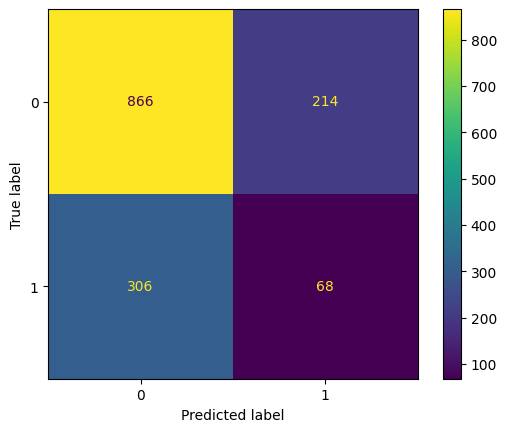

In [95]:
print(classification_report(y_val,y_previsto_rf))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto_rf);

#### RandomForestClassifier SMOTE

In [96]:
y_previsto_rf_smote = modelo_rf_smote.predict(X_val)
print(f'La precisión del modelo de RFC (SMOTE) es: {precision_score(y_val,y_previsto_rf_smote)}')
print(f'La sensibilidad (Recall) del modelo de RFC (SMOTE) es: {recall_score(y_val,y_previsto_rf_smote)}')
print(f'La exactitud (accuracy) del modelo de RFC (SMOTE) es: {accuracy_score(y_val,y_previsto_rf_smote)}')
print(f'El F1-score del modelo de RFC (SMOTE) es: {f1_score(y_val,y_previsto_rf_smote)}')

La precisión del modelo de RFC (SMOTE) es: 0.5738916256157636
La sensibilidad (Recall) del modelo de RFC (SMOTE) es: 0.6229946524064172
La exactitud (accuracy) del modelo de RFC (SMOTE) es: 0.7840440165061898
El F1-score del modelo de RFC (SMOTE) es: 0.5974358974358974


El área bajo la curva ROC es: 0.731404733610616


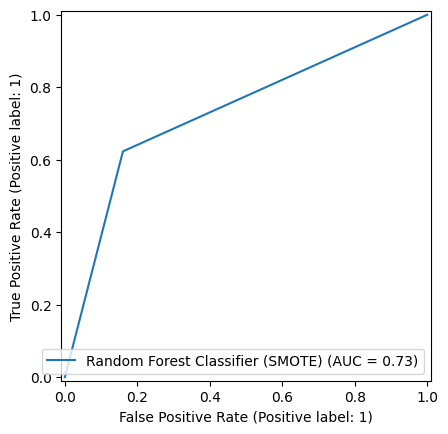

In [97]:
print(f'El área bajo la curva ROC es: {roc_auc_score(y_val,y_previsto_rf_smote)}')
RocCurveDisplay.from_predictions(y_val,y_previsto_rf_smote,name='Random Forest Classifier (SMOTE)');

El score promedio de precisión vs recall es: 0.4545052790188961


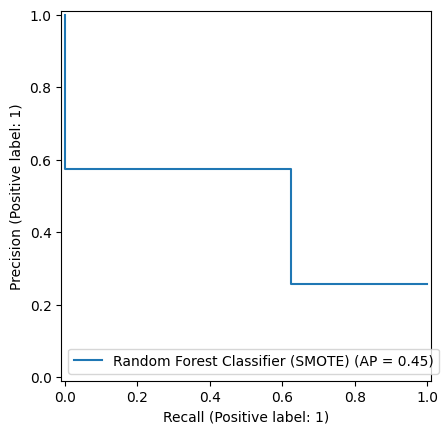

In [98]:
print(f'El score promedio de precisión vs recall es: {average_precision_score(y_val,y_previsto_rf_smote)}')
PrecisionRecallDisplay.from_predictions(y_val,y_previsto_rf_smote,name='Random Forest Classifier (SMOTE)');

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1080
           1       0.57      0.62      0.60       374

    accuracy                           0.78      1454
   macro avg       0.72      0.73      0.72      1454
weighted avg       0.79      0.78      0.79      1454



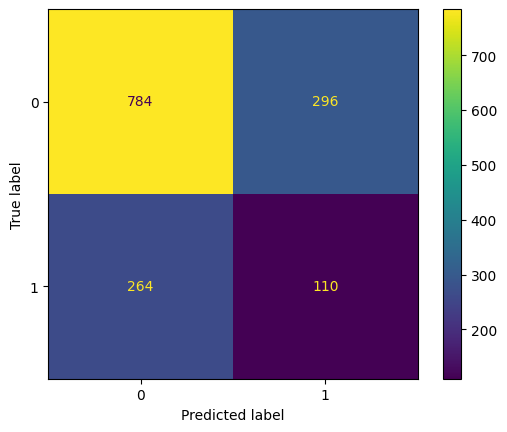

In [99]:
print(classification_report(y_val,y_previsto_rf_smote))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto_rf_smote);

#### RandomForestClassifier NearMiss

In [100]:
y_previsto_rf_nearmiss = modelo_rf_nearmiss.predict(X_val)
print(f'La precisión del modelo de RFC (NearMiss) es: {precision_score(y_val,y_previsto_rf_nearmiss)}')
print(f'La sensibilidad (Recall) del modelo de RFC (NearMiss) es: {recall_score(y_val,y_previsto_rf_nearmiss)}')
print(f'La exactitud (accuracy) del modelo de RFC (NearMiss) es: {accuracy_score(y_val,y_previsto_rf_nearmiss)}')
print(f'El F1-score del modelo de RFC (NearMiss) es: {f1_score(y_val,y_previsto_rf_nearmiss)}')

La precisión del modelo de RFC (NearMiss) es: 0.5241779497098646
La sensibilidad (Recall) del modelo de RFC (NearMiss) es: 0.7245989304812834
La exactitud (accuracy) del modelo de RFC (NearMiss) es: 0.7599724896836314
El F1-score del modelo de RFC (NearMiss) es: 0.6083052749719416


El área bajo la curva ROC es: 0.7484105763517528


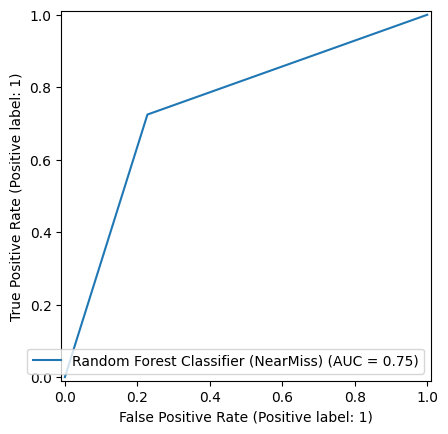

In [101]:
print(f'El área bajo la curva ROC es: {roc_auc_score(y_val,y_previsto_rf_nearmiss)}')
RocCurveDisplay.from_predictions(y_val,y_previsto_rf_nearmiss,name='Random Forest Classifier (NearMiss)');

El score promedio de precisión vs recall es: 0.45065784639088335


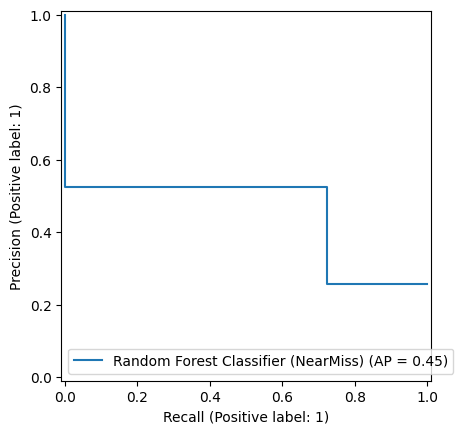

In [102]:
print(f'El score promedio de precisión vs recall es: {average_precision_score(y_val,y_previsto_rf_nearmiss)}')
PrecisionRecallDisplay.from_predictions(y_val,y_previsto_rf_nearmiss,name='Random Forest Classifier (NearMiss)');

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1080
           1       0.52      0.72      0.61       374

    accuracy                           0.76      1454
   macro avg       0.71      0.75      0.72      1454
weighted avg       0.80      0.76      0.77      1454



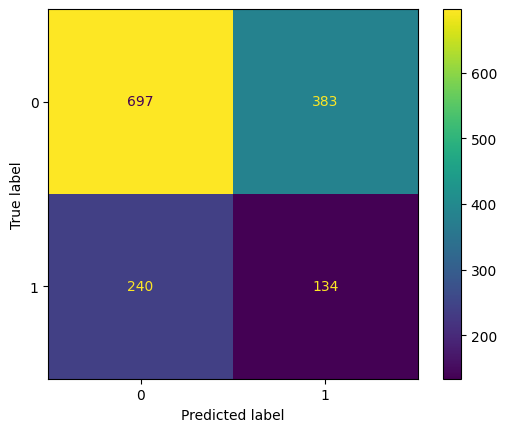

In [103]:
print(classification_report(y_val,y_previsto_rf_nearmiss))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto_rf_nearmiss);

### Evaluación de modelos KNN

#### KNN sin balanceo

In [104]:
y_previsto_knn = knn.predict(X_val_normalizado)
print(f'La precisión del modelo de KNN es: {precision_score(y_val,y_previsto_knn)}')
print(f'La sensibilidad (Recall) del modelo de KNN es: {recall_score(y_val,y_previsto_knn)}')
print(f'La exactitud (accuracy) del modelo de KNN es: {accuracy_score(y_val,y_previsto_knn)}')
print(f'El F1-score del modelo de KNN es: {f1_score(y_val,y_previsto_knn)}')

La precisión del modelo de KNN es: 0.49271137026239065
La sensibilidad (Recall) del modelo de KNN es: 0.45187165775401067
La exactitud (accuracy) del modelo de KNN es: 0.7393397524071527
El F1-score del modelo de KNN es: 0.4714086471408647


El área bajo la curva ROC es: 0.6453802733214498


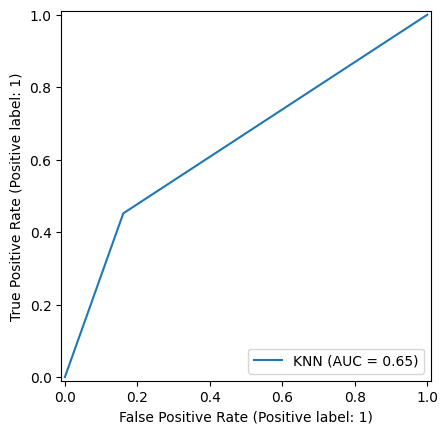

In [105]:
print(f'El área bajo la curva ROC es: {roc_auc_score(y_val,y_previsto_knn)}')
RocCurveDisplay.from_predictions(y_val,y_previsto_knn,name='KNN');

El score promedio de precisión vs recall es: 0.3636326750639876


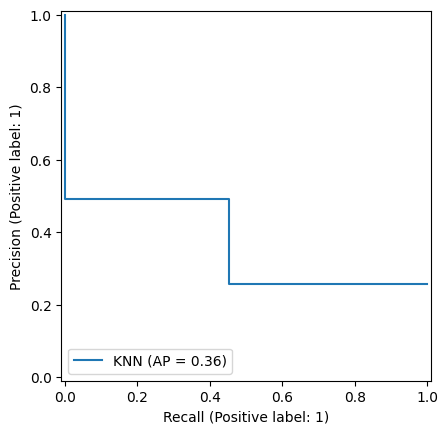

In [106]:
print(f'El score promedio de precisión vs recall es: {average_precision_score(y_val,y_previsto_knn)}')
PrecisionRecallDisplay.from_predictions(y_val,y_previsto_knn,name='KNN');

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1080
           1       0.49      0.45      0.47       374

    accuracy                           0.74      1454
   macro avg       0.65      0.65      0.65      1454
weighted avg       0.73      0.74      0.74      1454



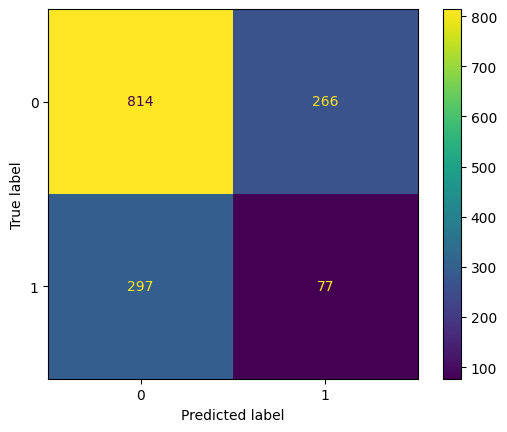

In [107]:
print(classification_report(y_val,y_previsto_knn))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto_knn);

#### KNN SMOTE

In [108]:
y_previsto_knn_smote = knn_smote.predict(X_val_normalizado)
print(f'La precisión del modelo de KNN (SMOTE) es: {precision_score(y_val,y_previsto_knn_smote)}')
print(f'La sensibilidad (Recall) del modelo de KNN (SMOTE) es: {recall_score(y_val,y_previsto_knn_smote)}')
print(f'La exactitud (accuracy) del modelo de KNN (SMOTE) es: {accuracy_score(y_val,y_previsto_knn_smote)}')
print(f'El F1-score del modelo de KNN (SMOTE) es: {f1_score(y_val,y_previsto_knn_smote)}')

La precisión del modelo de KNN (SMOTE) es: 0.42696629213483145
La sensibilidad (Recall) del modelo de KNN (SMOTE) es: 0.7112299465240641
La exactitud (accuracy) del modelo de KNN (SMOTE) es: 0.6801925722145805
El F1-score del modelo de KNN (SMOTE) es: 0.5336008024072216


El área bajo la curva ROC es: 0.6903371954842543


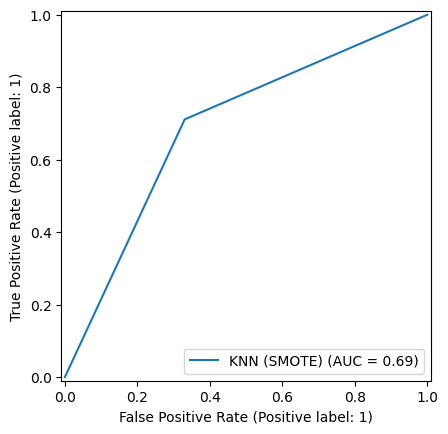

In [109]:
print(f'El área bajo la curva ROC es: {roc_auc_score(y_val,y_previsto_knn_smote)}')
RocCurveDisplay.from_predictions(y_val,y_previsto_knn_smote,name='KNN (SMOTE)');

El score promedio de precisión vs recall es: 0.3779490673179574


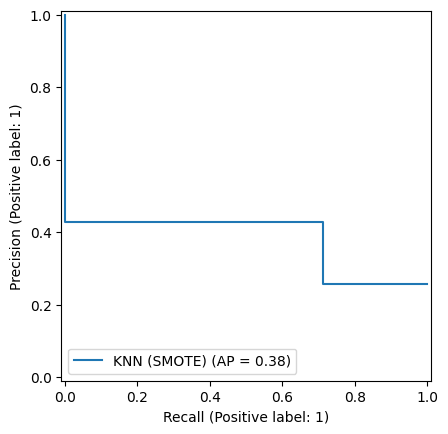

In [110]:
print(f'El score promedio de precisión vs recall es: {average_precision_score(y_val,y_previsto_knn_smote)}')
PrecisionRecallDisplay.from_predictions(y_val,y_previsto_knn_smote,name='KNN (SMOTE)');

              precision    recall  f1-score   support

           0       0.87      0.67      0.76      1080
           1       0.43      0.71      0.53       374

    accuracy                           0.68      1454
   macro avg       0.65      0.69      0.65      1454
weighted avg       0.76      0.68      0.70      1454



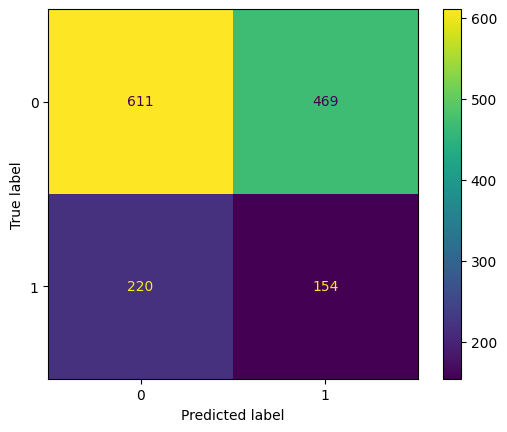

In [111]:
print(classification_report(y_val,y_previsto_knn_smote))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto_knn_smote);

#### KNN NearMiss

In [112]:
y_previsto_knn_nearmiss = knn_nearmiss.predict(X_val_normalizado)
print(f'La precisión del modelo de KNN (NearMiss) es: {precision_score(y_val,y_previsto_knn_nearmiss)}')
print(f'La sensibilidad (Recall) del modelo de KNN (NearMiss) es: {recall_score(y_val,y_previsto_knn_nearmiss)}')
print(f'La exactitud (accuracy) del modelo de KNN (NearMiss) es: {accuracy_score(y_val,y_previsto_knn_nearmiss)}')
print(f'El F1-score del modelo de KNN (NearMiss) es: {f1_score(y_val,y_previsto_knn_nearmiss)}')

La precisión del modelo de KNN (NearMiss) es: 0.43865546218487395
La sensibilidad (Recall) del modelo de KNN (NearMiss) es: 0.6978609625668449
La exactitud (accuracy) del modelo de KNN (NearMiss) es: 0.6925722145804677
El F1-score del modelo de KNN (NearMiss) es: 0.5386996904024768


El área bajo la curva ROC es: 0.6943008516537928


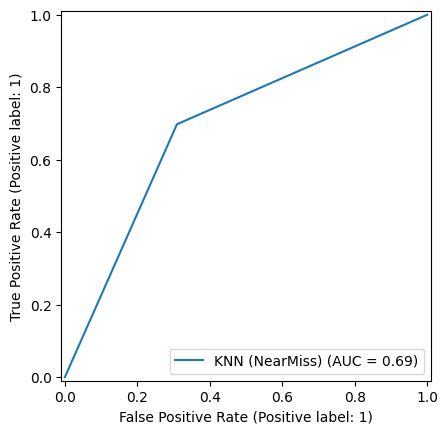

In [113]:
print(f'El área bajo la curva ROC es: {roc_auc_score(y_val,y_previsto_knn_nearmiss)}')
RocCurveDisplay.from_predictions(y_val,y_previsto_knn_nearmiss,name='KNN (NearMiss)');

El score promedio de precisión vs recall es: 0.3838371668169434


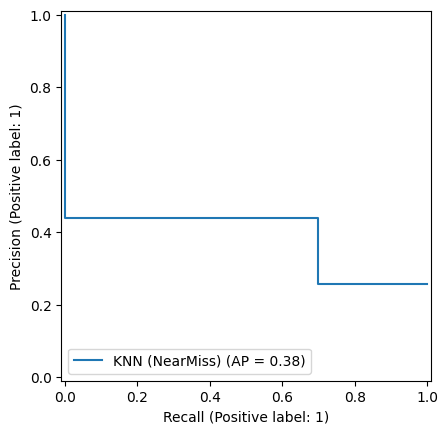

In [114]:
print(f'El score promedio de precisión vs recall es: {average_precision_score(y_val,y_previsto_knn_nearmiss)}')
PrecisionRecallDisplay.from_predictions(y_val,y_previsto_knn_nearmiss,name='KNN (NearMiss)');

              precision    recall  f1-score   support

           0       0.87      0.69      0.77      1080
           1       0.44      0.70      0.54       374

    accuracy                           0.69      1454
   macro avg       0.65      0.69      0.65      1454
weighted avg       0.76      0.69      0.71      1454



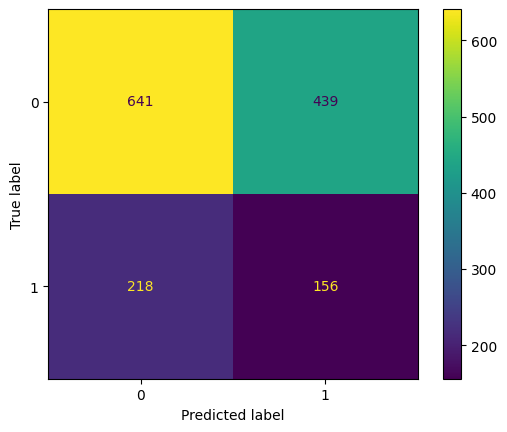

In [115]:
print(classification_report(y_val,y_previsto_knn_nearmiss))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto_knn_nearmiss);

### Evaluación de modelos de Regresión logística

#### Regresión logística sin balanceo

In [116]:
y_previsto_log = modelo_log.predict(X_val_normalizado)
print(f'La precisión del modelo de Regresión logística es: {precision_score(y_val,y_previsto_log)}')
print(f'La sensibilidad (Recall) del modelo de Regresión logística es: {recall_score(y_val,y_previsto_log)}')
print(f'La exactitud (accuracy) del modelo de Regresión logística es: {accuracy_score(y_val,y_previsto_log)}')
print(f'El F1-score del modelo de Regresión logística es: {f1_score(y_val,y_previsto_log)}')

La precisión del modelo de Regresión logística es: 0.6554054054054054
La sensibilidad (Recall) del modelo de Regresión logística es: 0.5187165775401069
La exactitud (accuracy) del modelo de Regresión logística es: 0.8060522696011004
El F1-score del modelo de Regresión logística es: 0.5791044776119403


El área bajo la curva ROC es: 0.7121360665478311


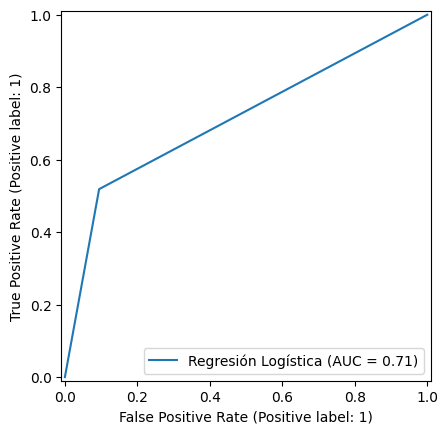

In [117]:
print(f'El área bajo la curva ROC es: {roc_auc_score(y_val,y_previsto_log)}')
RocCurveDisplay.from_predictions(y_val,y_previsto_log,name='Regresión Logística');

El score promedio de precisión vs recall es: 0.46376607245205026


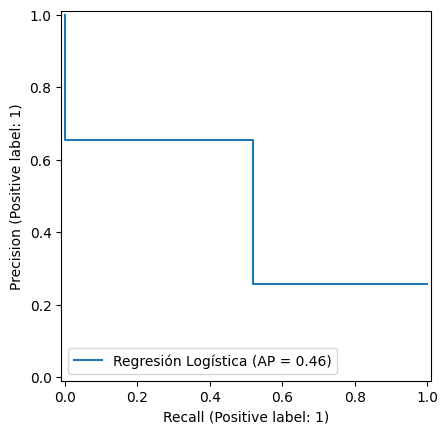

In [118]:
print(f'El score promedio de precisión vs recall es: {average_precision_score(y_val,y_previsto_log)}')
PrecisionRecallDisplay.from_predictions(y_val,y_previsto_log,name='Regresión Logística');

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1080
           1       0.66      0.52      0.58       374

    accuracy                           0.81      1454
   macro avg       0.75      0.71      0.73      1454
weighted avg       0.80      0.81      0.80      1454



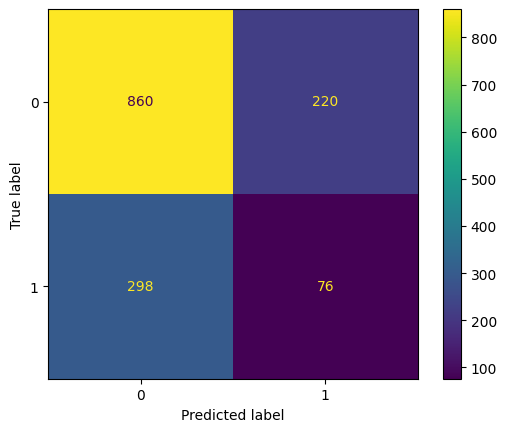

In [119]:
print(classification_report(y_val,y_previsto_log))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto_log);

#### Regresión logística SMOTE

In [120]:
y_previsto_log_smote = modelo_log_smote.predict(X_val_normalizado)
print(f'La precisión del modelo de Regresión logística (SMOTE) es: {precision_score(y_val,y_previsto_log_smote)}')
print(f'La sensibilidad (Recall) del modelo de Regresión logística (SMOTE) es: {recall_score(y_val,y_previsto_log_smote)}')
print(f'La exactitud (accuracy) del modelo de Regresión logística (SMOTE) es: {accuracy_score(y_val,y_previsto_log_smote)}')
print(f'El F1-score del modelo de Regresión logística (SMOTE) es: {f1_score(y_val,y_previsto_log_smote)}')

La precisión del modelo de Regresión logística (SMOTE) es: 0.5093062605752962
La sensibilidad (Recall) del modelo de Regresión logística (SMOTE) es: 0.8048128342245989
La exactitud (accuracy) del modelo de Regresión logística (SMOTE) es: 0.750343878954608
El F1-score del modelo de Regresión logística (SMOTE) es: 0.6238341968911917


El área bajo la curva ROC es: 0.7681471578530401


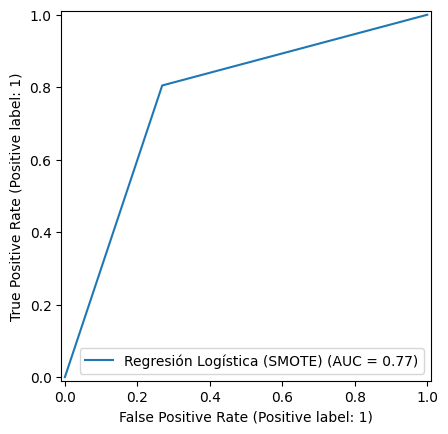

In [121]:
print(f'El área bajo la curva ROC es: {roc_auc_score(y_val,y_previsto_log_smote)}')
RocCurveDisplay.from_predictions(y_val,y_previsto_log_smote,name='Regresión Logística (SMOTE)');

El score promedio de precisión vs recall es: 0.46010254243470095


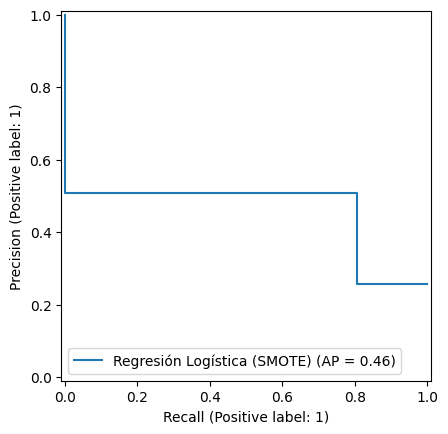

In [122]:
print(f'El score promedio de precisión vs recall es: {average_precision_score(y_val,y_previsto_log_smote)}')
PrecisionRecallDisplay.from_predictions(y_val,y_previsto_log_smote,name='Regresión Logística (SMOTE)');

              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1080
           1       0.51      0.80      0.62       374

    accuracy                           0.75      1454
   macro avg       0.71      0.77      0.72      1454
weighted avg       0.81      0.75      0.76      1454



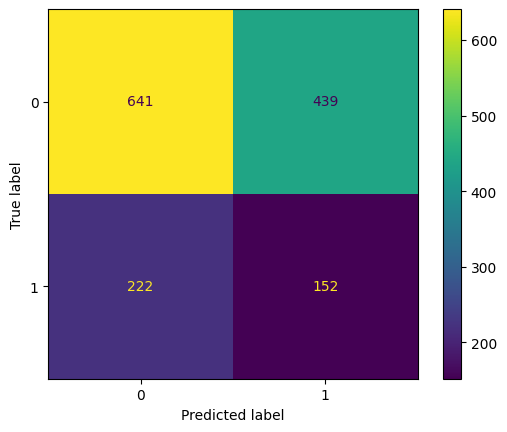

In [123]:
print(classification_report(y_val,y_previsto_log_smote))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto_log_smote);

#### Regresión logística NearMiss

In [124]:
y_previsto_log_nearmiss = modelo_log_nearmiss.predict(X_val_normalizado)
print(f'La precisión del modelo de Regresión logística (NearMiss) es: {precision_score(y_val,y_previsto_log_nearmiss)}')
print(f'La sensibilidad (Recall) del modelo de Regresión logística (NearMiss) es: {recall_score(y_val,y_previsto_log_nearmiss)}')
print(f'La exactitud (accuracy) del modelo de Regresión logística (NearMiss) es: {accuracy_score(y_val,y_previsto_log_nearmiss)}')
print(f'El F1-score del modelo de Regresión logística (NearMiss) es: {f1_score(y_val,y_previsto_log_nearmiss)}')

La precisión del modelo de Regresión logística (NearMiss) es: 0.4965277777777778
La sensibilidad (Recall) del modelo de Regresión logística (NearMiss) es: 0.7647058823529411
La exactitud (accuracy) del modelo de Regresión logística (NearMiss) es: 0.7400275103163686
El F1-score del modelo de Regresión logística (NearMiss) es: 0.6021052631578947


El área bajo la curva ROC es: 0.7480936819172113


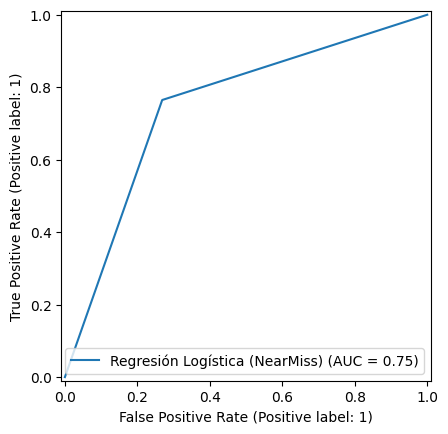

In [125]:
print(f'El área bajo la curva ROC es: {roc_auc_score(y_val,y_previsto_log_nearmiss)}')
RocCurveDisplay.from_predictions(y_val,y_previsto_log_nearmiss,name='Regresión Logística (NearMiss)');

El score promedio de precisión vs recall es: 0.44022040842930477


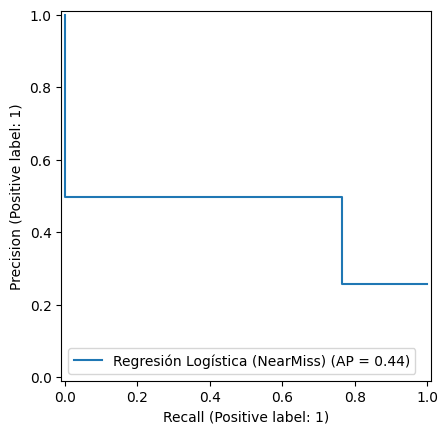

In [126]:
print(f'El score promedio de precisión vs recall es: {average_precision_score(y_val,y_previsto_log_nearmiss)}')
PrecisionRecallDisplay.from_predictions(y_val,y_previsto_log_nearmiss,name='Regresión Logística (NearMiss)');

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1080
           1       0.50      0.76      0.60       374

    accuracy                           0.74      1454
   macro avg       0.70      0.75      0.70      1454
weighted avg       0.80      0.74      0.75      1454



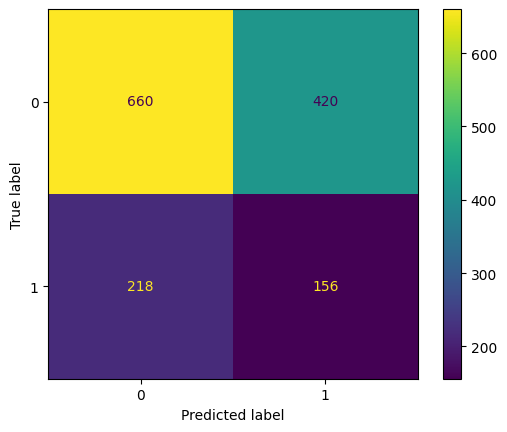

In [127]:
print(classification_report(y_val,y_previsto_log_nearmiss))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto_log_nearmiss);

## Importancia de las variables

Realizamos un análisis de la importancia de las variables según cada modelo

In [129]:
def importancia_variables(modelo):
  modelo_importances = modelo.feature_importances_
  return pd.DataFrame({'Features': one_hot.get_feature_names_out(columnas), 'Importances': (modelo_importances*100).round(2)}).sort_values('Importances', ascending=False)

In [130]:
importancia_variables(modelo_arbol)

Features  Importances
15     onehotencoder__Tipo de contrato_month-to-month        45.15
23                       remainder__Tiempo de cliente        14.67
7     onehotencoder__Servicio de Internet_fiber optic        14.25
24                            remainder__Cuenta total         8.79
21      onehotencoder__Forma de pago_electronic check         3.09
8              onehotencoder__Servicio de Internet_no         2.75
5                onehotencoder__Multiples lineas_True         2.31
14            onehotencoder__Streaming Peliculas_True         1.45
12                onehotencoder__Soporte Premium_True         1.24
4           onehotencoder__Servicio de telefonia_True         1.22
16           onehotencoder__Tipo de contrato_one year         1.02
13          onehotencoder__Suscripción por cable_True         0.97
0                          onehotencoder__Genero_male         0.70
1                 onehotencoder__Mayor a 65 Años_True         0.60
10              onehotencoder__Respaldo en linea_True         0.43
3                    onehotencoder__Dependientes_True         0.40
18           onehotencoder__Facturacion en linea_True         0.38
20  onehotencoder__Forma de pago_credit card (auto...         0.29
17           onehotencoder__Tipo de contrato_two year         0.24
9              onehotencoder__Seguridad en linea_True         0.06
2                          onehotencoder__Casad@_True         0.00
6             onehotencoder__Servicio de Internet_dsl         0.00
11     onehotencoder__Proteccion del dispositivo_True         0.00
19  onehotencoder__Forma de pago_bank transfer (au...         0.00
22          onehotencoder__Forma de pago_mailed check         0.00

In [132]:
importancia_variables(modelo_arbol_smote)

Features  Importances
15     onehotencoder__Tipo de contrato_month-to-month        53.93
21      onehotencoder__Forma de pago_electronic check        18.29
7     onehotencoder__Servicio de Internet_fiber optic        10.31
23                       remainder__Tiempo de cliente         4.44
18           onehotencoder__Facturacion en linea_True         3.08
12                onehotencoder__Soporte Premium_True         1.92
17           onehotencoder__Tipo de contrato_two year         1.62
24                            remainder__Cuenta total         1.62
16           onehotencoder__Tipo de contrato_one year         1.43
14            onehotencoder__Streaming Peliculas_True         1.33
8              onehotencoder__Servicio de Internet_no         1.08
22          onehotencoder__Forma de pago_mailed check         0.26
13          onehotencoder__Suscripción por cable_True         0.25
0                          onehotencoder__Genero_male         0.12
10              onehotencoder__Respaldo en linea_True         0.11
5                onehotencoder__Multiples lineas_True         0.09
3                    onehotencoder__Dependientes_True         0.06
4           onehotencoder__Servicio de telefonia_True         0.03
1                 onehotencoder__Mayor a 65 Años_True         0.03
6             onehotencoder__Servicio de Internet_dsl         0.00
2                          onehotencoder__Casad@_True         0.00
9              onehotencoder__Seguridad en linea_True         0.00
11     onehotencoder__Proteccion del dispositivo_True         0.00
20  onehotencoder__Forma de pago_credit card (auto...         0.00
19  onehotencoder__Forma de pago_bank transfer (au...         0.00

In [133]:
importancia_variables(modelo_arbol_nearmiss)

Features  Importances
23                       remainder__Tiempo de cliente        57.82
15     onehotencoder__Tipo de contrato_month-to-month        14.09
7     onehotencoder__Servicio de Internet_fiber optic         6.67
24                            remainder__Cuenta total         4.97
4           onehotencoder__Servicio de telefonia_True         2.73
21      onehotencoder__Forma de pago_electronic check         1.81
12                onehotencoder__Soporte Premium_True         1.62
17           onehotencoder__Tipo de contrato_two year         1.43
9              onehotencoder__Seguridad en linea_True         1.33
10              onehotencoder__Respaldo en linea_True         1.26
13          onehotencoder__Suscripción por cable_True         1.13
14            onehotencoder__Streaming Peliculas_True         1.13
20  onehotencoder__Forma de pago_credit card (auto...         0.90
0                          onehotencoder__Genero_male         0.90
1                 onehotencoder__Mayor a 65 Años_True         0.82
22          onehotencoder__Forma de pago_mailed check         0.78
2                          onehotencoder__Casad@_True         0.59
8              onehotencoder__Servicio de Internet_no         0.00
6             onehotencoder__Servicio de Internet_dsl         0.00
5                onehotencoder__Multiples lineas_True         0.00
3                    onehotencoder__Dependientes_True         0.00
16           onehotencoder__Tipo de contrato_one year         0.00
11     onehotencoder__Proteccion del dispositivo_True         0.00
19  onehotencoder__Forma de pago_bank transfer (au...         0.00
18           onehotencoder__Facturacion en linea_True         0.00

In [134]:
importancia_variables(modelo_rf)

Features  Importances
23                       remainder__Tiempo de cliente        16.53
24                            remainder__Cuenta total        16.45
15     onehotencoder__Tipo de contrato_month-to-month        14.63
7     onehotencoder__Servicio de Internet_fiber optic         7.87
21      onehotencoder__Forma de pago_electronic check         5.35
17           onehotencoder__Tipo de contrato_two year         5.16
8              onehotencoder__Servicio de Internet_no         3.72
18           onehotencoder__Facturacion en linea_True         3.05
9              onehotencoder__Seguridad en linea_True         2.24
12                onehotencoder__Soporte Premium_True         2.07
5                onehotencoder__Multiples lineas_True         1.90
6             onehotencoder__Servicio de Internet_dsl         1.89
16           onehotencoder__Tipo de contrato_one year         1.81
2                          onehotencoder__Casad@_True         1.81
14            onehotencoder__Streaming Peliculas_True         1.76
3                    onehotencoder__Dependientes_True         1.76
10              onehotencoder__Respaldo en linea_True         1.70
13          onehotencoder__Suscripción por cable_True         1.70
0                          onehotencoder__Genero_male         1.66
1                 onehotencoder__Mayor a 65 Años_True         1.58
11     onehotencoder__Proteccion del dispositivo_True         1.26
22          onehotencoder__Forma de pago_mailed check         1.15
19  onehotencoder__Forma de pago_bank transfer (au...         1.02
4           onehotencoder__Servicio de telefonia_True         1.00
20  onehotencoder__Forma de pago_credit card (auto...         0.94

In [135]:
importancia_variables(modelo=modelo_rf_smote)

Features  Importances
15     onehotencoder__Tipo de contrato_month-to-month        19.98
21      onehotencoder__Forma de pago_electronic check        12.18
7     onehotencoder__Servicio de Internet_fiber optic         8.72
23                       remainder__Tiempo de cliente         8.17
24                            remainder__Cuenta total         6.66
18           onehotencoder__Facturacion en linea_True         6.15
17           onehotencoder__Tipo de contrato_two year         5.88
12                onehotencoder__Soporte Premium_True         4.04
8              onehotencoder__Servicio de Internet_no         3.30
9              onehotencoder__Seguridad en linea_True         3.05
16           onehotencoder__Tipo de contrato_one year         2.60
2                          onehotencoder__Casad@_True         2.49
3                    onehotencoder__Dependientes_True         2.24
6             onehotencoder__Servicio de Internet_dsl         2.04
20  onehotencoder__Forma de pago_credit card (auto...         1.48
10              onehotencoder__Respaldo en linea_True         1.45
13          onehotencoder__Suscripción por cable_True         1.37
14            onehotencoder__Streaming Peliculas_True         1.36
0                          onehotencoder__Genero_male         1.31
1                 onehotencoder__Mayor a 65 Años_True         1.23
19  onehotencoder__Forma de pago_bank transfer (au...         1.23
5                onehotencoder__Multiples lineas_True         0.95
22          onehotencoder__Forma de pago_mailed check         0.80
11     onehotencoder__Proteccion del dispositivo_True         0.72
4           onehotencoder__Servicio de telefonia_True         0.62

In [136]:
importancia_variables(modelo_rf_nearmiss)

Features  Importances
23                       remainder__Tiempo de cliente        24.53
24                            remainder__Cuenta total        22.62
15     onehotencoder__Tipo de contrato_month-to-month         8.86
9              onehotencoder__Seguridad en linea_True         3.24
17           onehotencoder__Tipo de contrato_two year         3.19
12                onehotencoder__Soporte Premium_True         3.15
21      onehotencoder__Forma de pago_electronic check         3.14
7     onehotencoder__Servicio de Internet_fiber optic         3.04
3                    onehotencoder__Dependientes_True         2.13
6             onehotencoder__Servicio de Internet_dsl         2.12
18           onehotencoder__Facturacion en linea_True         2.12
13          onehotencoder__Suscripción por cable_True         1.98
14            onehotencoder__Streaming Peliculas_True         1.95
16           onehotencoder__Tipo de contrato_one year         1.94
10              onehotencoder__Respaldo en linea_True         1.89
0                          onehotencoder__Genero_male         1.88
2                          onehotencoder__Casad@_True         1.79
5                onehotencoder__Multiples lineas_True         1.76
1                 onehotencoder__Mayor a 65 Años_True         1.69
11     onehotencoder__Proteccion del dispositivo_True         1.54
22          onehotencoder__Forma de pago_mailed check         1.50
4           onehotencoder__Servicio de telefonia_True         1.20
19  onehotencoder__Forma de pago_bank transfer (au...         1.12
20  onehotencoder__Forma de pago_credit card (auto...         1.08
8              onehotencoder__Servicio de Internet_no         0.57

In [140]:
def importancia_variables_log(modelo):
  coef_log = pd.Series(modelo.coef_[0], index=one_hot.get_feature_names_out(columnas))
  coef_log.sort_values(ascending=False).plot(kind='barh', figsize=(10,6), title='Importancia de variables - Regresión Logística')

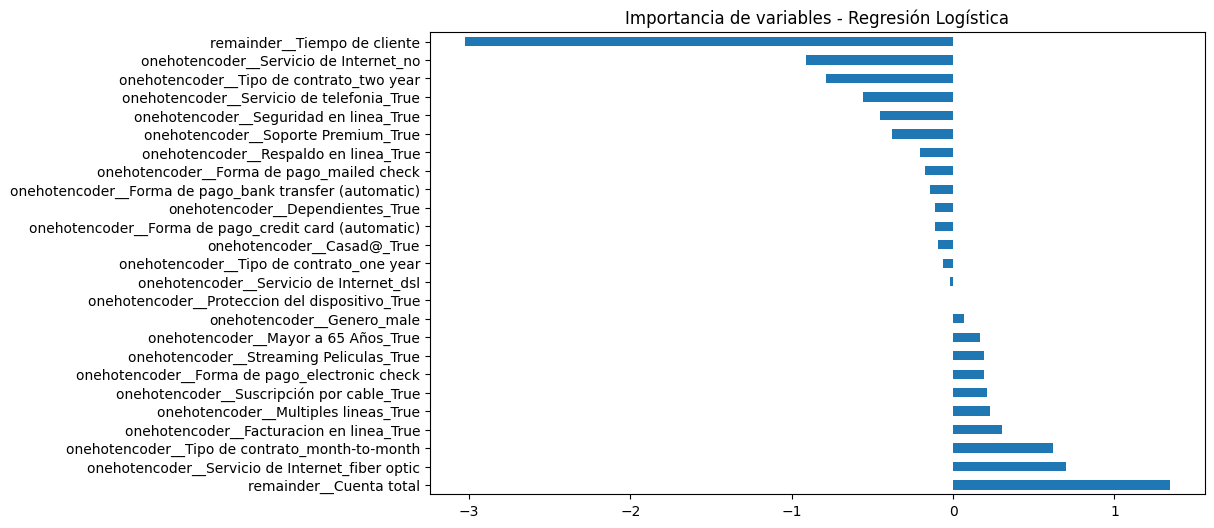

In [141]:
importancia_variables_log(modelo_log)

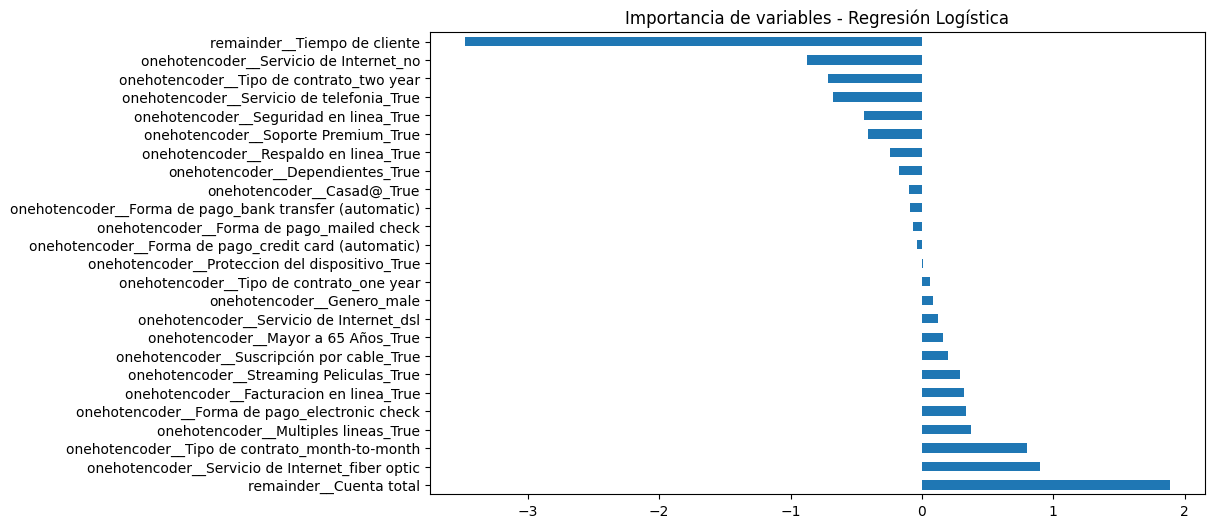

In [142]:
importancia_variables_log(modelo_log_smote)

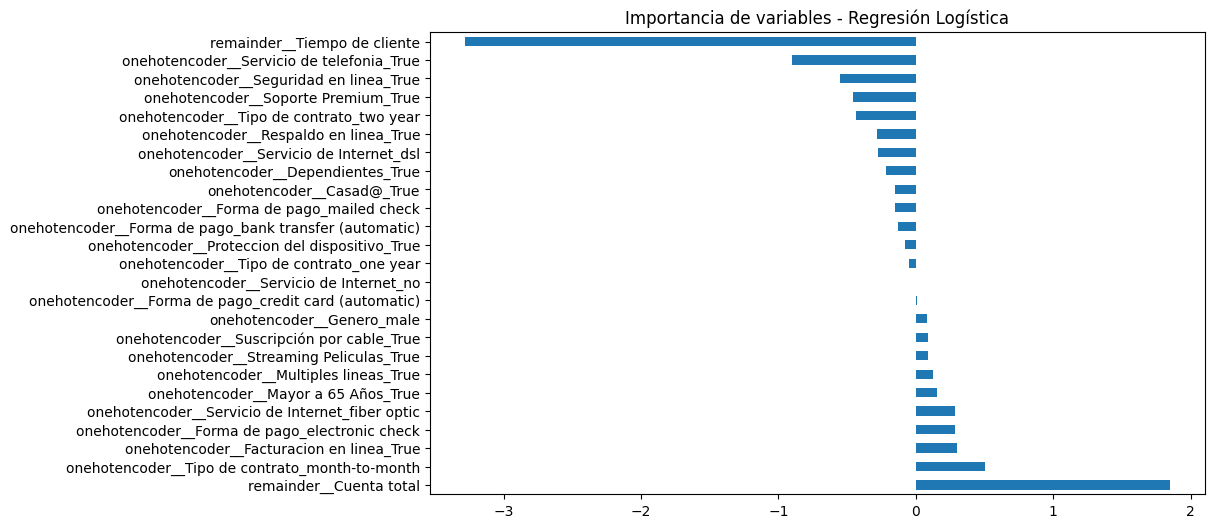

In [143]:
importancia_variables_log(modelo_log_nearmiss)

Como se observa, las variables más importantes para los modelos son Tiempo de cliente y Tipo de contrato y por último la cuenta total. Siendo estos los factores que más afectan a los clientes en su elección de quedarse o dejar la empresa.

## Conclusión


Según las metricas escogidas para el análisis "recall" y el análisis de la matriz de confusión, podemos definir cual sería el módelo "champion", para enviar a producción que ayude a prevenir clientes que potencialmente puedan dejar la empresa.
El modelo escogido es: RandomForestClassifier con un balanceo de datos con el metodo NearMiss en su versión 3.
Se pueden ajustar ciertos hiperparámetros y pulir un poco más el modelo.
Ahora procedemos a usar la libreria pickle para exportar el modelo.

In [145]:
print(f'La precisión del modelo es: {precision_score(y_val,y_previsto_rf_nearmiss)}')
print(f'La sensibilidad (Recall) del modelo es: {recall_score(y_val,y_previsto_rf_nearmiss)}')
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val,y_previsto_rf_nearmiss)}')

La precisión del modelo es: 0.5241779497098646
La sensibilidad (Recall) del modelo es: 0.7245989304812834
La exactitud (accuracy) del modelo es: 0.7599724896836314


In [147]:
import pickle

try:
  with open ('champion.pkl','wb') as file:
    pickle.dump(modelo_rf_nearmiss,file)
except Exception as e:
  print('Se presentó un error al almacenar el modelo: ',str(e))

print('Modelo serializado con éxito')

Modelo serializado con éxito


# INFORME

## Conclusiones

✅ Usar el modelo champion para predecir el comportamiento del cliente, haciendo enfásis en las variables con más importancia de los modelos probados, Tiempo de cliente, Tipo de contrato, Cuenta total. Entiendiendo que los clientes nuevos van a ser más propensos a dejar la empresa se hacen las siguientes recomendaciones estrategicas.



## 🛡️ Recomendaciones Estratégicas

Estrategia de retención:

Se recomienda crear beneficios para que los nuevos clientes y los actuales opten por contratos a largo plazo como los de un año o dos años.

Estrategia de gasto:

Se recomienda crear paquetes promocionales que aumenten el gasto de los clientes mensualmente en la empresa, ya que los clientes que han invertido mucho dinero en la empresa son menos propensos a irse.


Estrategia temporal:

Se recomienda crear beneficios claros para los clientes que lleven más de 1 año en la compañía, haciendo mas atractivo para los nuevos clientes quedarse en la compañía por más tiempo.


